In [35]:
# libraries importieren
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [ ]:
# Daten erstellen

# Parameter des Datensets
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 1, 1)
store_ids = [f"Store_{i}" for i in range(1, 11)]  # 10 stores in Hamburg
product_categories = [
    "Obst", "Gemüse", "Molkereiprodukte", "Getränke", "Fleisch & Wurstwaren",
    "Brot & Backwaren", "Snacks", "Tiefkühlkost", "Konserven & Trockenprodukte",
    "Drogerie & Körperpflege", "Haushalt"
]

#  Definiere das Preiswörterbuch für jedes Produkt
product_prices = {
    "Obst": {"Äpfel": 1.99, "Birnen": 2.49, "Bananen": 0.79, "Erdbeeren": 3.79, "Trauben": 4.49, "Zitrusfrüchte": 2.79},
    "Gemüse": {"Tomaten": 1.79, "Gurken": 1.49, "Paprika": 1.99, "Karotten": 1.29, "Salat": 2.49, "Zwiebeln": 0.99, "Petersilie": 1.79, "Basilikum": 2.29, "Schnittlauch": 1.49},
    "Molkereiprodukte": {"Vollmilch": 1.29, "fettarme Milch": 1.19, "laktosefreie Milch": 1.39, "Naturjoghurt": 1.99, "Fruchtjoghurt": 2.29, "griechischer Joghurt": 2.49, "Gouda": 3.79, "Emmentaler": 4.49, "Mozzarella": 3.49, "Feta": 4.29, "Milchschnitte": 2.29, "Fruchtzwerge": 1.79},
    "Getränke": {"Stilles Wasser": 0.79, "Mineralwasser": 1.29, "Orangensaft": 2.49, "Apfelsaft": 1.99, "Multivitaminsaft": 3.29, "Cola": 2.29, "Fanta": 2.29, "Sprite": 2.29, "Energy Drinks": 3.49, "Pils": 3.79, "Weizenbier": 4.49, "Dunkelbier": 4.99, "Weißwein": 5.79, "Rotwein": 7.49, "Rosé": 6.99},
    "Fleisch & Wurstwaren": {"Schnitzel": 5.49, "Hackfleisch": 3.99, "Koteletts": 5.49, "Hähnchenbrust": 5.99, "Putenfilets": 5.99, "Hähnchenschenkel": 4.49, "Rinderhack": 4.99, "Rinderbraten": 5.49, "Salami": 4.29, "Lyoner": 3.79, "Mortadella": 3.99, "Käsewurst": 3.99},
    "Brot & Backwaren": {"Vollkornbrot": 2.79, "Weißbrot": 1.99, "Roggenbrot": 2.49, "Ciabatta": 2.29, "Semmeln": 1.29, "Laugenbrötchen": 1.49, "Körnerbrötchen": 1.79, "Croissants": 1.99, "Muffins": 2.79, "Kuchen": 3.79},
    "Snacks": {"Chips": 2.29, "Schokolade": 1.99, "Nüsse": 3.99},
    "Tiefkühlkost": {"Pizza": 4.99, "Lasagne": 5.99, "Nudelgerichte": 5.49, "Tiefkühlgemüsemischungen": 2.29, "Erbsen": 1.79, "Mais": 1.79, "Fischstäbchen": 4.99, "Garnelen": 6.29, "Lachs": 6.99, "Vanilleeis": 3.79, "Schokoladeneis": 3.99, "Stracciatellaeis": 4.29},
    "Konserven & Trockenprodukte": {"Tomatenmark": 1.29, "Tomatenstücke": 1.99, "Kidneybohnen": 1.79, "Kichererbsen": 1.99, "Spaghetti": 2.29, "Penne": 2.29, "Fusilli": 2.29, "Rundkornreis": 2.49, "Basmatireis": 2.99, "Linsen": 1.99},
    "Drogerie & Körperpflege": {"Shampoo": 2.79, "Conditioner": 3.29, "Haarspray": 3.49, "Haargel": 3.49, "Haarfärbemittel": 5.49, "Duschgel": 2.29, "Seife": 1.79, "Bodylotion": 4.99, "Deodorant": 3.49, "Rasierprodukte": 5.99, "Zahnpasta": 2.79, "Zahnbürsten": 2.49, "Mundspülung": 3.29, "Gesichtscreme": 6.79, "Reinigungsmilch": 5.29, "Gesichtsmasken": 7.49, "Make-up": 8.79, "Lippenstift": 7.29, "Nagellack": 5.79, "Mascara": 7.49, "Windeln": 5.49, "Feuchttücher": 4.79, "Babycreme": 5.99, "Babypuder": 4.79},
    "Haushalt": {"Spülmittel": 2.29, "Waschmittel": 3.79, "Allzweckreiniger": 3.29, "WC-Reiniger": 2.79, "Toilettenpapier": 1.29, "Küchenrolle": 1.99, "Taschentücher": 1.79, "Töpfe": 5.99, "Pfannen": 6.49, "Besteck": 3.99, "Geschirr": 4.99, "Schwämme": 1.49, "Bürsten": 2.99, "Lappen": 1.79}
}

# Define promotions for approximately 5 products per category
promotions = {}
for category, products in product_prices.items():
    promoted_products = random.sample(list(products.keys()), min(5, len(products)))
    promotions[category] = {product: random.choice([0.01, 0.02, 0.05, 0.1]) for product in promoted_products}

# Define profit margin for each product category
profit_margin = {
    "Obst": 0.015,  # 1.5%
    "Gemüse": 0.015,  # 1.5%
    "Molkereiprodukte": 0.02,  # 2%
    "Getränke": 0.1,  # 10%
    "Fleisch & Wurstwaren": 0.05,  # 5%
    "Brot & Backwaren": 0.025,  # 2.5%
    "Snacks": 0.04,  # 4%
    "Tiefkühlkost": 0.03,  # 3%
    "Konserven & Trockenprodukte": 0.03,  # 3%
    "Drogerie & Körperpflege": 0.07,  # 7%
    "Haushalt": 0.07  # 7%
}

# Function to generate sales data with promotions
def generate_sales_data():
    sales_data = []
    current_date = start_date

    while current_date < end_date:
        if current_date.weekday() == 6:  # Skip Sundays
            current_date += timedelta(days=1)
            continue

        for _ in range(random.randint(500, 1000)):  # 500-1000 transactions per day
            transaction_id = f"ALDI_{current_date.strftime('%Y%m%d')}_{random.randint(1000000, 9999999)}"
            datetime_of_sale = current_date + timedelta(minutes=random.randint(0, 1439))
            store_id = random.choice(store_ids)

            # Generate a random time between 07:00 and 22:00
            time_of_day = timedelta(hours=random.randint(7, 21), minutes=random.randint(0, 59))
            datetime_of_sale = current_date + time_of_day
            
            store_id = random.choice(store_ids)

            # Generate multiple products under the same transaction ID
            for __ in range(random.randint(1, 5)):
                category = random.choice(list(product_prices.keys()))
                product = random.choice(list(product_prices[category].keys()))
                base_price = product_prices[category][product]
                quantity = random.randint(1, 3)
                discount = 0

                # Apply promotion if the product is selected and approximately 30% of the time
                if product in promotions[category] and random.random() < 0.3:
                    discount = promotions[category][product]
                    price = round(base_price * (1 - discount), 2)
                else:
                    price = base_price

                # Calculate the total amount for this product
                total_amount = round(price * quantity, 2)

                # Calculate purchase price based on the category's profit margin
                purchase_price = round(base_price / (1 + profit_margin[category]), 2)

                # Append transaction data
                sales_data.append({
                    "Transaction ID": transaction_id,
                    "DateTime": datetime_of_sale,
                    "Store ID": store_id,
                    "Product Category": category,
                    "Product Name": product,
                    "Purchase Price": purchase_price,
                    "Sales Price": price,
                    "Quantity Sold": quantity,
                    "Total Amount": total_amount,
                    "Discount Applied": discount,
                    "Payment Method": random.choice(["Bargeld", "Kreditkarte", "EC-Karte"]),
                })

        current_date += timedelta(days=1)

    return pd.DataFrame(sales_data)

# Generate dataset and save to CSV
df = generate_sales_data()
df.to_csv("aldi_sales_data.csv", index=False, encoding='utf-8')

In [67]:
# Daten anzeigen & inspizieren
df.head(10)

Transaction ID             DateTime Store ID  \
0  ALDI_20230102_3858138  2023-01-02 12:50:00  Store_9   
1  ALDI_20230102_6686801  2023-01-02 20:17:00  Store_2   
2  ALDI_20230102_7513452  2023-01-02 20:15:00  Store_2   
3  ALDI_20230102_7513452  2023-01-02 20:15:00  Store_2   
4  ALDI_20230102_7513452  2023-01-02 20:15:00  Store_2   
5  ALDI_20230102_3667365  2023-01-02 18:05:00  Store_4   
6  ALDI_20230102_3847488  2023-01-02 07:26:00  Store_1   
7  ALDI_20230102_3847488  2023-01-02 07:26:00  Store_1   
8  ALDI_20230102_3847488  2023-01-02 07:26:00  Store_1   
9  ALDI_20230102_3549161  2023-01-02 21:38:00  Store_7   

              Product Category    Product Name  Purchase Price  Sales Price  \
0                       Snacks           Nüsse            3.84         3.79   
1                       Gemüse         Tomaten            1.76         1.79   
2             Molkereiprodukte      Emmentaler            4.40         4.49   
3                       Snacks      Schokolade            1.91         1.99   
4      Drogerie & Körperpflege  Rasierprodukte            5.60         5.99   
5         Fleisch & Wurstwaren          Lyoner            3.61         3.41   
6  Konserven & Trockenprodukte     Basmatireis            2.90         2.99   
7                       Snacks      Schokolade            1.91         1.99   
8                       Snacks      Schokolade            1.91         1.89   
9                       Snacks           Chips            2.20         2.29   

   Quantity Sold  Total Amount  Discount Applied Payment Method Weekday  \
0              2          7.58              0.05    Kreditkarte  Monday   
1              1          1.79              0.00    Kreditkarte  Monday   
2              1          4.49              0.00        Bargeld  Monday   
3              1          1.99              0.00        Bargeld  Monday   
4              1          5.99              0.00        Bargeld  Monday   
5              3         10.23              0.10       EC-Karte  Monday   
6              3          8.97              0.00    Kreditkarte  Monday   
7              3          5.97              0.00    Kreditkarte  Monday   
8              2          3.78              0.05        Bargeld  Monday   
9              2          4.58              0.00        Bargeld  Monday   

         Date  
0  2023-01-02  
1  2023-01-02  
2  2023-01-02  
3  2023-01-02  
4  2023-01-02  
5  2023-01-02  
6  2023-01-02  
7  2023-01-02  
8  2023-01-02  
9  2023-01-02

In [19]:
# Data cleaning
# Inspect data and check for missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712783 entries, 0 to 712782
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction ID    712783 non-null  object        
 1   DateTime          712783 non-null  datetime64[ns]
 2   Store ID          712783 non-null  object        
 3   Product Category  712783 non-null  object        
 4   Product Name      712783 non-null  object        
 5   Purchase Price    712783 non-null  float64       
 6   Sales Price       712783 non-null  float64       
 7   Quantity Sold     712783 non-null  int64         
 8   Total Amount      712783 non-null  float64       
 9   Discount Applied  712783 non-null  float64       
 10  Payment Method    712783 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 59.8+ MB


Transaction ID      0
DateTime            0
Store ID            0
Product Category    0
Product Name        0
Purchase Price      0
Sales Price         0
Quantity Sold       0
Total Amount        0
Discount Applied    0
Payment Method      0
dtype: int64

                                Umsatz  Einkaufskosten    Gewinn
Product Category                                                
Getränke                     461592.01       421657.16  39934.85
Drogerie & Körperpflege      620048.21       582274.75  37773.46
Fleisch & Wurstwaren         624074.32       597098.63  26975.69
Haushalt                     411588.58       385680.81  25907.77
Tiefkühlkost                 572628.08       556744.97  15883.11
Snacks                       353052.61       343772.47   9280.14
Konserven & Trockenprodukte  277723.72       271753.79   5969.93
Molkereiprodukte             331270.41       325562.54   5707.87
Brot & Backwaren             293643.33       288557.72   5085.61
Gemüse                       222756.32       221181.91   1574.41
Obst                         349903.23       348547.30   1355.93
                                              Umsatz  Einkaufskosten   Gewinn
Product Category            Product Name                                     

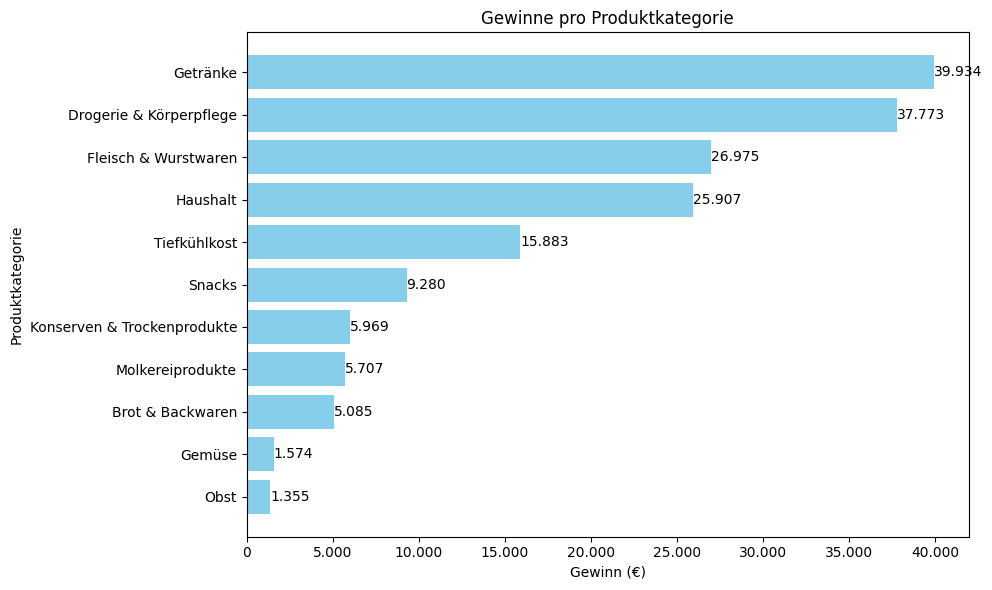

In [59]:
# Gewinne pro Produktkategorie berechnen und sortieren

categories_profit = (
    df.groupby("Product Category")
    .agg(
        Umsatz=("Total Amount", "sum"),
        Einkaufskosten=("Purchase Price", lambda x: (x * df.loc[x.index, "Quantity Sold"]).sum())
    )
    .assign(Gewinn=lambda x: x["Umsatz"] - x["Einkaufskosten"])
    .sort_values("Gewinn", ascending=False)
)

print(categories_profit)

# Gewinne pro Produkt berechnen und sortieren
products_profit = (
    df.groupby(["Product Category", "Product Name"])
    .agg(
        Umsatz=("Total Amount", "sum"),
        Einkaufskosten=("Purchase Price", lambda x: (x * df.loc[x.index, "Quantity Sold"]).sum())
    )
    .assign(Gewinn=lambda x: x["Umsatz"] - x["Einkaufskosten"])
    .sort_values("Gewinn", ascending=False)
)

print(products_profit)

# Visualisierung Balkendiagramm
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Gewinne pro Kategorie extrahieren
categories_profit_plot = categories_profit.reset_index()

# Funktion zur Formatierung der X-Achse
def format_euro(x, pos):
    """Fügt einen Punkt nach jeder dritten Stelle ein."""
    return f"{int(x):,}".replace(",", ".")

# Balkendiagramm
plt.figure(figsize=(10, 6))
bars = plt.barh(categories_profit_plot["Product Category"], categories_profit_plot["Gewinn"], color="skyblue")

# Werte auf Balken anzeigen
for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width()):,}".replace(",", "."),
        va="center",
        ha="left",
        fontsize=10,
        color="black"
    )

plt.xlabel("Gewinn (€)")
plt.ylabel("Produktkategorie")
plt.title("Gewinne pro Produktkategorie")
plt.gca().invert_yaxis()  # Umkehren, damit die höchsten Gewinne oben stehen

# Formatierung der X-Achse
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_euro))

plt.tight_layout()
plt.show()

           Total_Sales
Wochentag             
Monday       749015.88
Tuesday      723976.59
Wednesday    760681.83
Thursday     745369.29
Friday       763495.79
Saturday     775741.44
Sunday             NaN
           Total_Sales    Prozent
Wochentag                        
Monday       749015.88  16.577453
Tuesday      723976.59  16.023276
Wednesday    760681.83  16.835647
Thursday     745369.29  16.496746
Friday       763495.79  16.897927
Saturday     775741.44  17.168951
Sunday             NaN        NaN


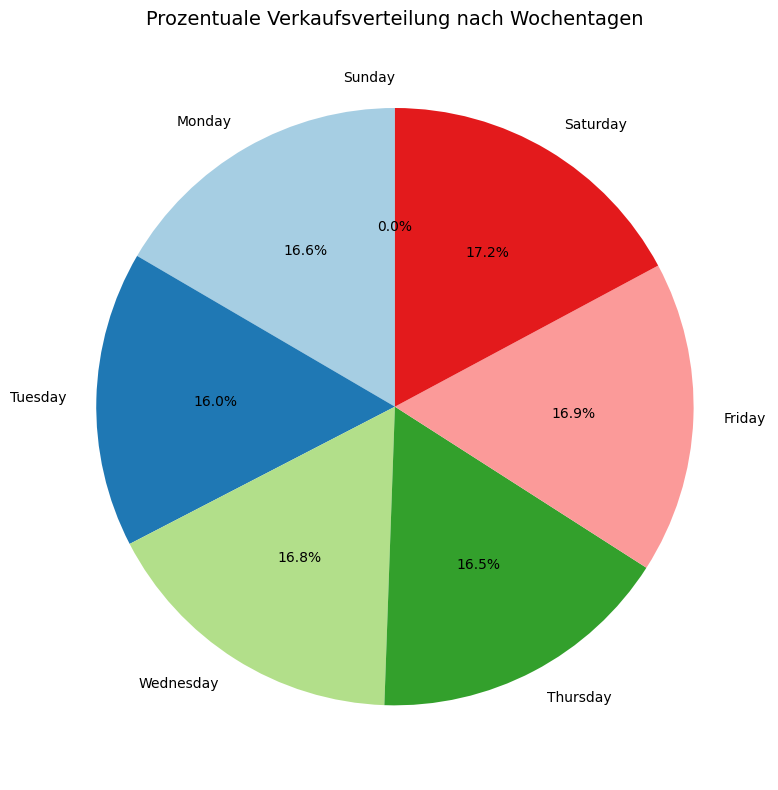

In [ ]:
# Verkaufsverteilung nach Wochentagen

# Spalte für Wochentage erstellen
df['Wochentag'] = df['DateTime'].dt.day_name()  # Alternativ: .dt.weekday (0=Montag, 6=Sonntag)

# Verkaufsverteilung nach Wochentagen berechnen
wochentag_verteilung = (
    df.groupby('Wochentag')
    .agg(Total_Sales=('Total Amount', 'sum'))  # Oder .size() für Anzahl der Verkäufe
)

# Optional: Wochentage in richtiger Reihenfolge sortieren
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
wochentag_verteilung = wochentag_verteilung.reindex(weekday_order)

print(wochentag_verteilung)

#Mit prozentualer Verteilung
wochentag_verteilung['Prozent'] = (wochentag_verteilung['Total_Sales'] / wochentag_verteilung['Total_Sales'].sum()) * 100
print(wochentag_verteilung)

# NaN-Werte durch 0 ersetzen
wochentag_verteilung = wochentag_verteilung.fillna(0)
#Visualisierung
# Tortendiagramm
plt.figure(figsize=(8, 8))
plt.pie(
    wochentag_verteilung['Prozent'], 
    labels=wochentag_verteilung.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Paired.colors
)

plt.title("Prozentuale Verkaufsverteilung nach Wochentagen", fontsize=14)
plt.tight_layout()
plt.show()

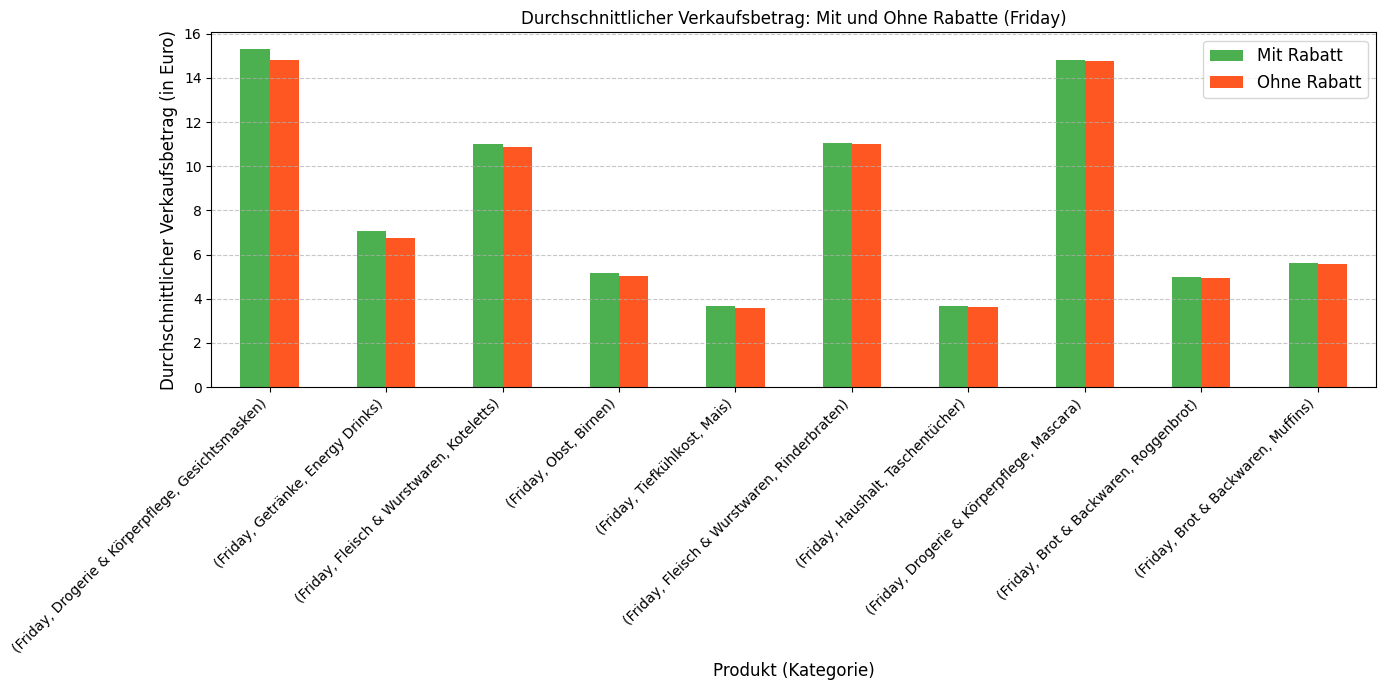

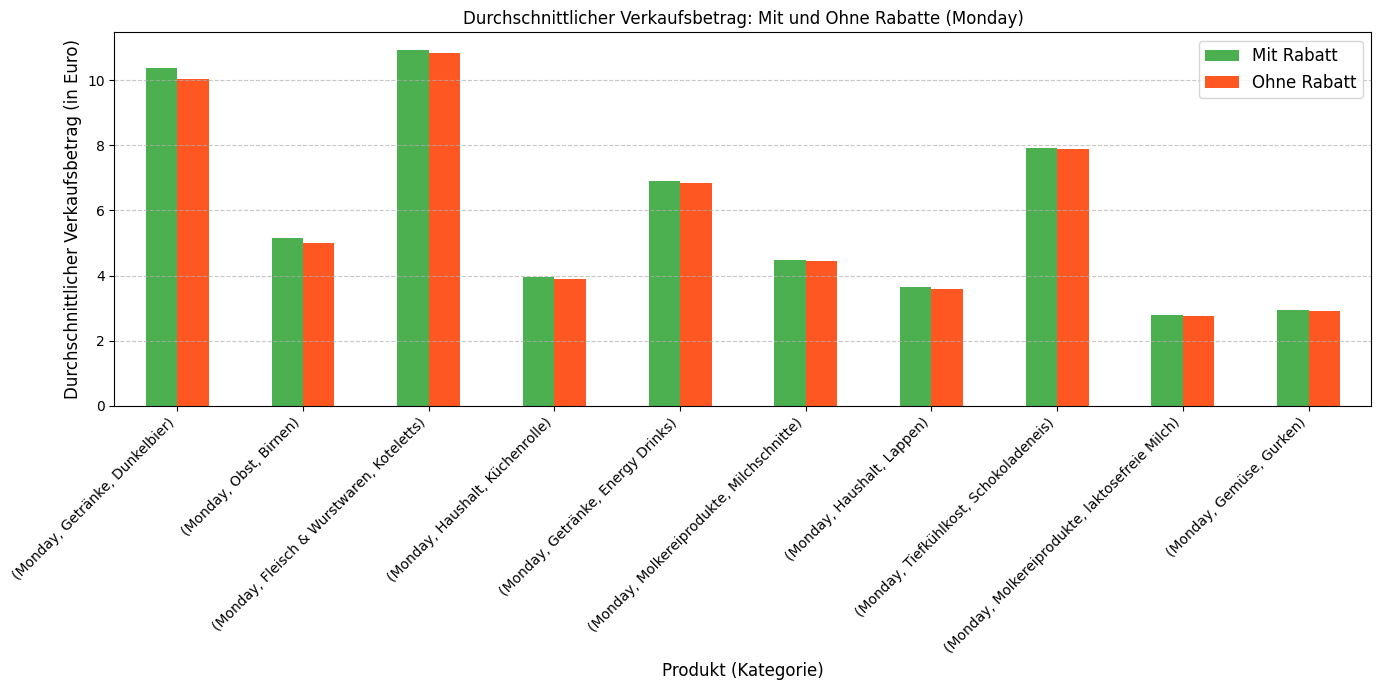

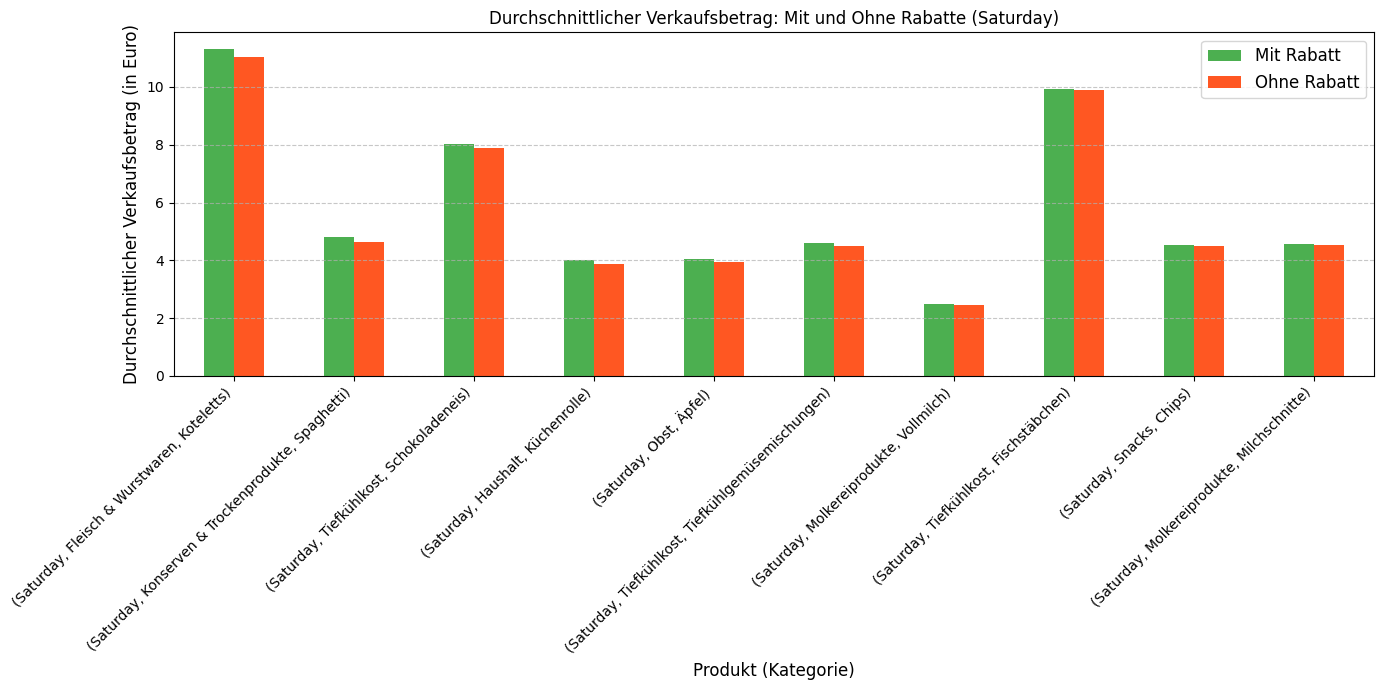

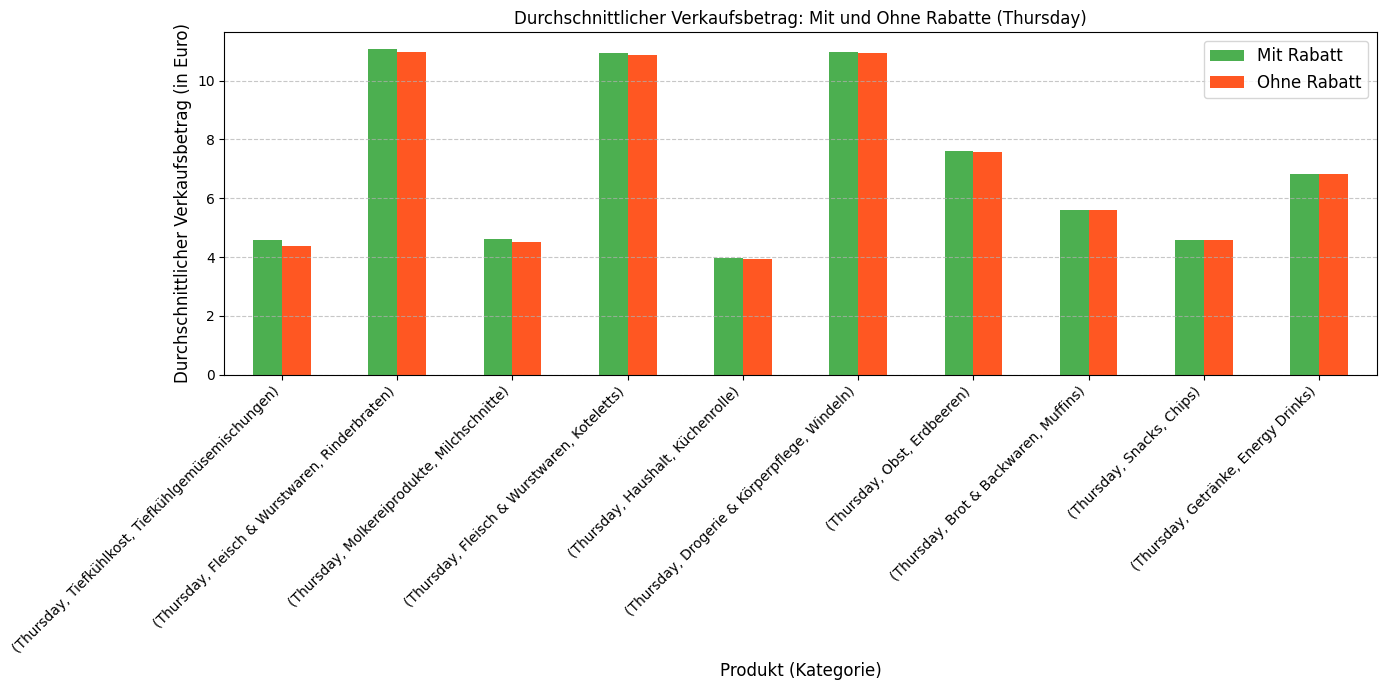

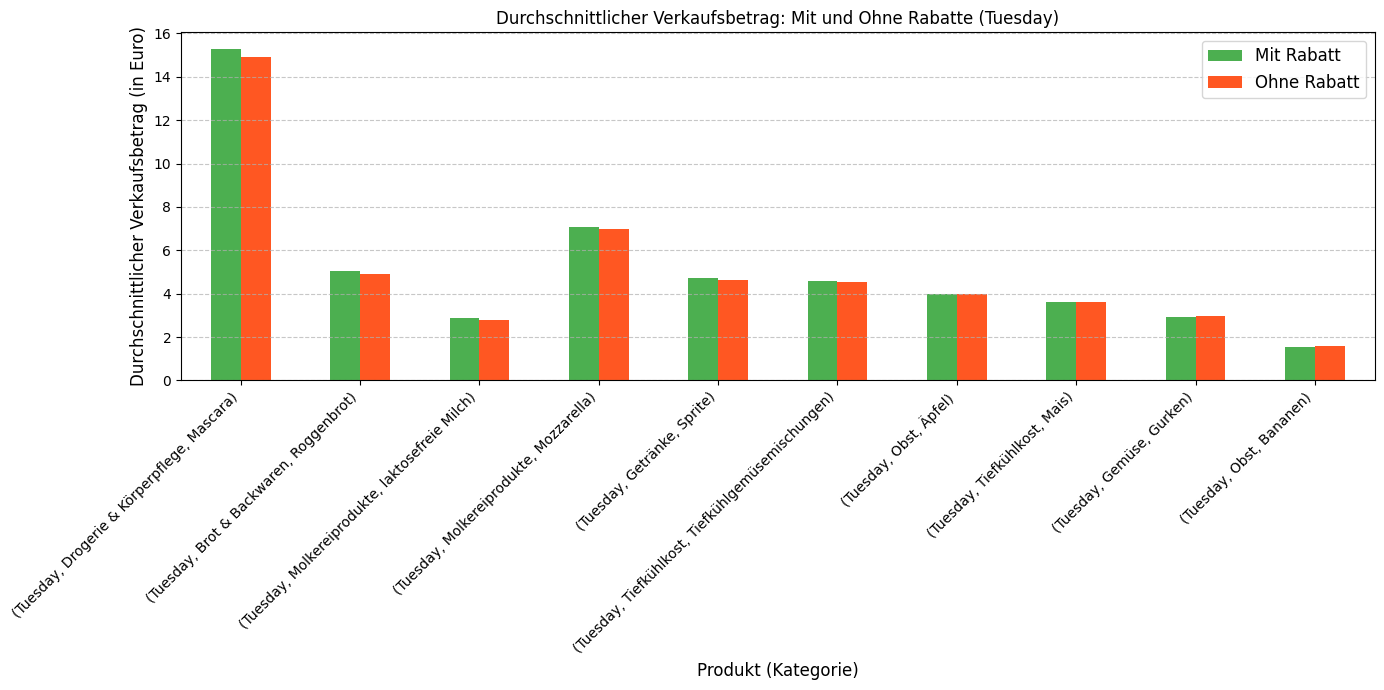

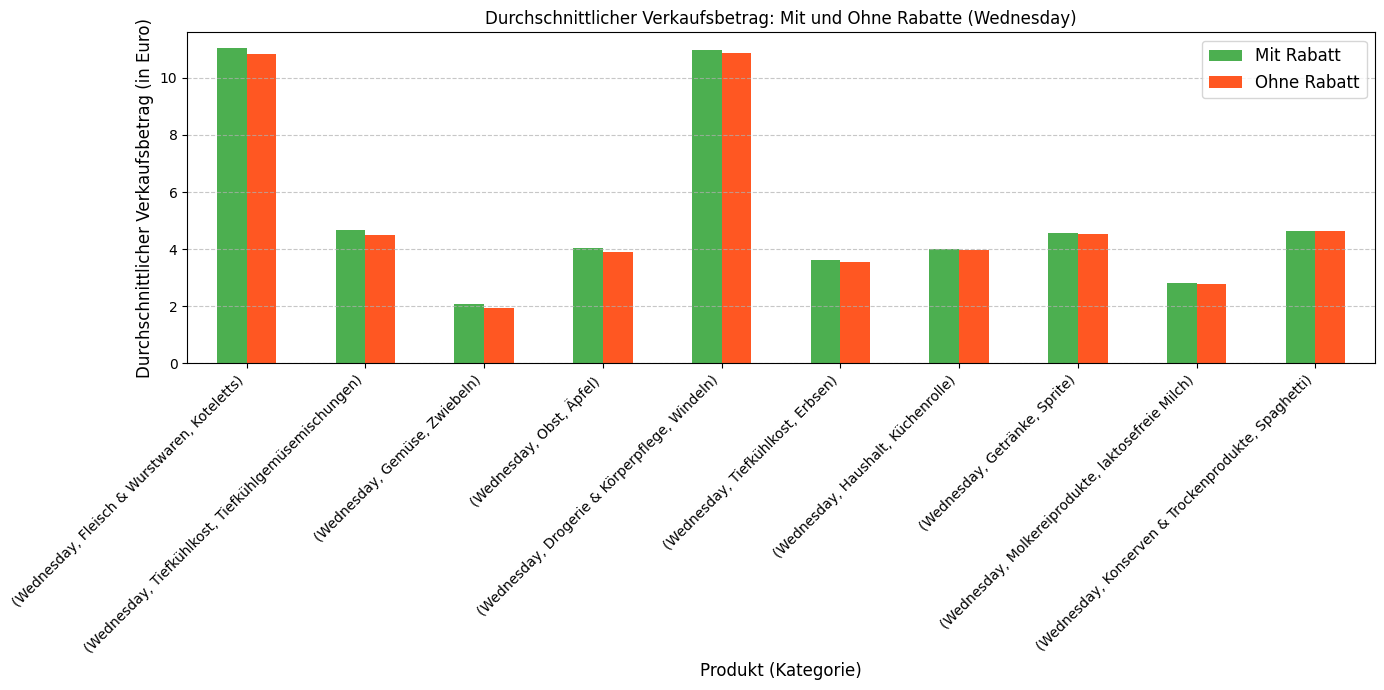

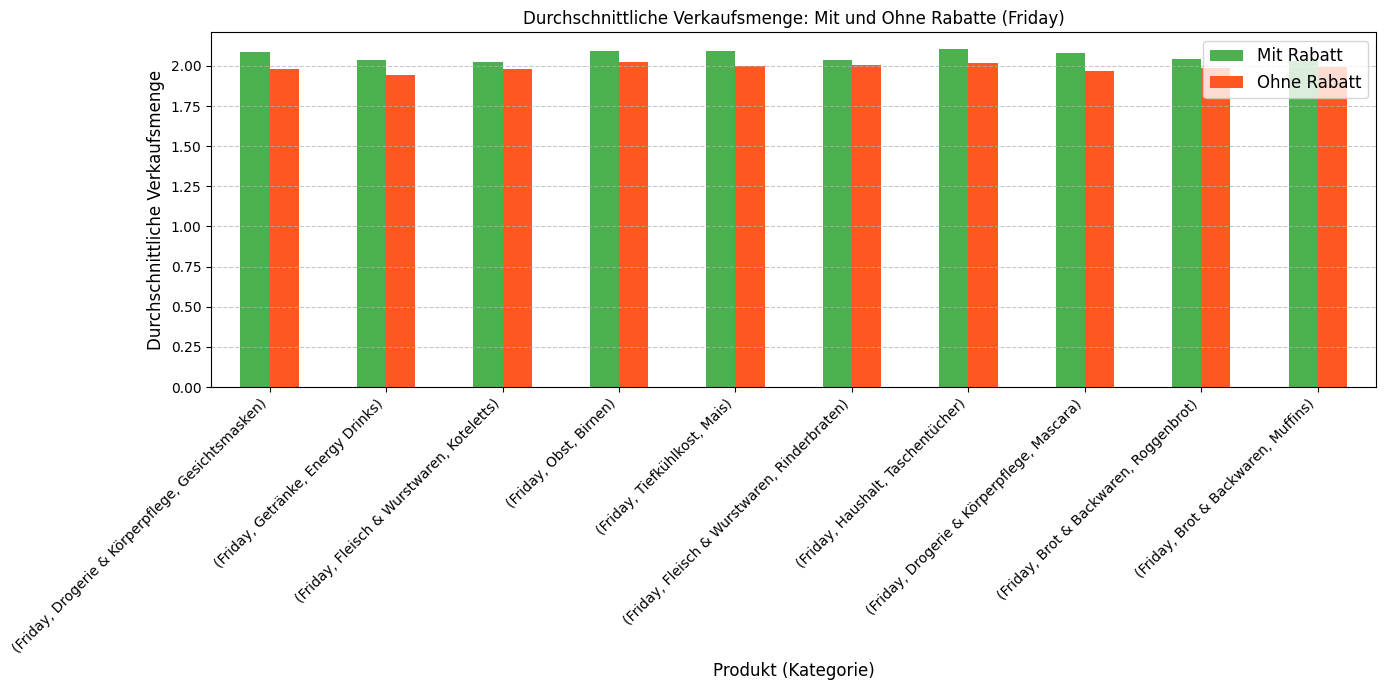

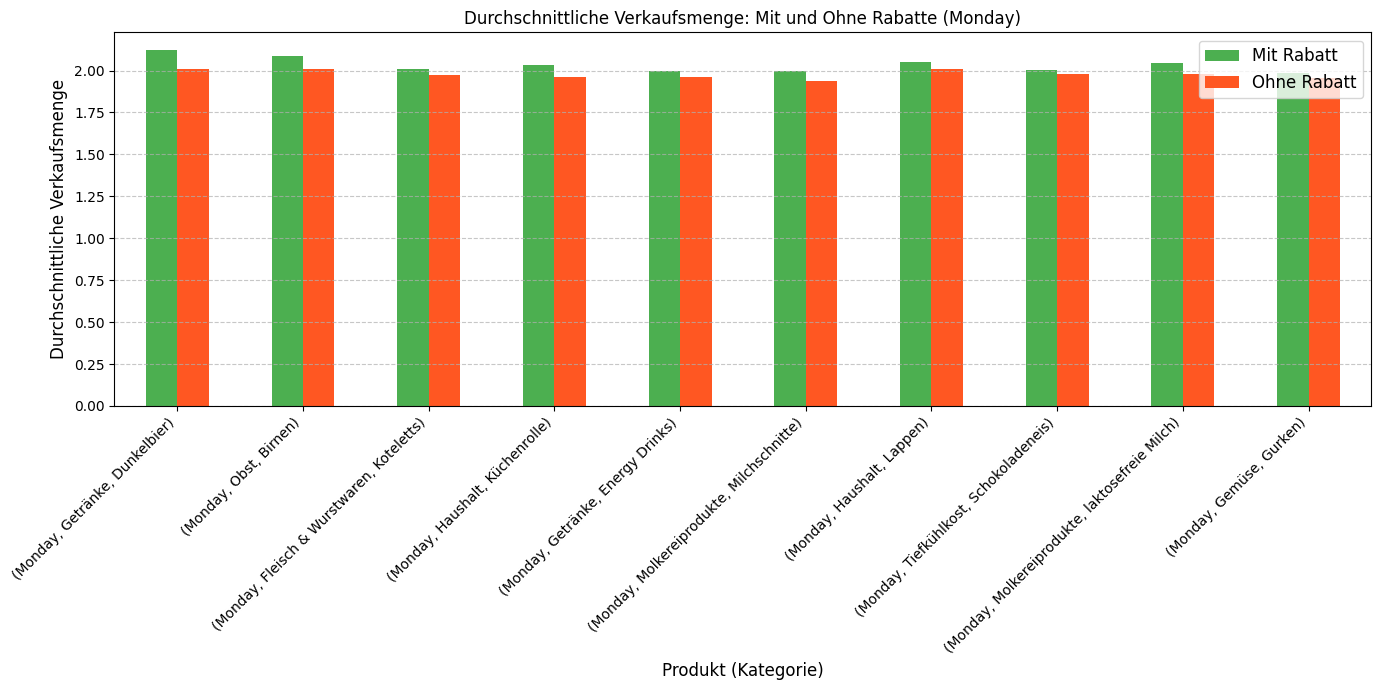

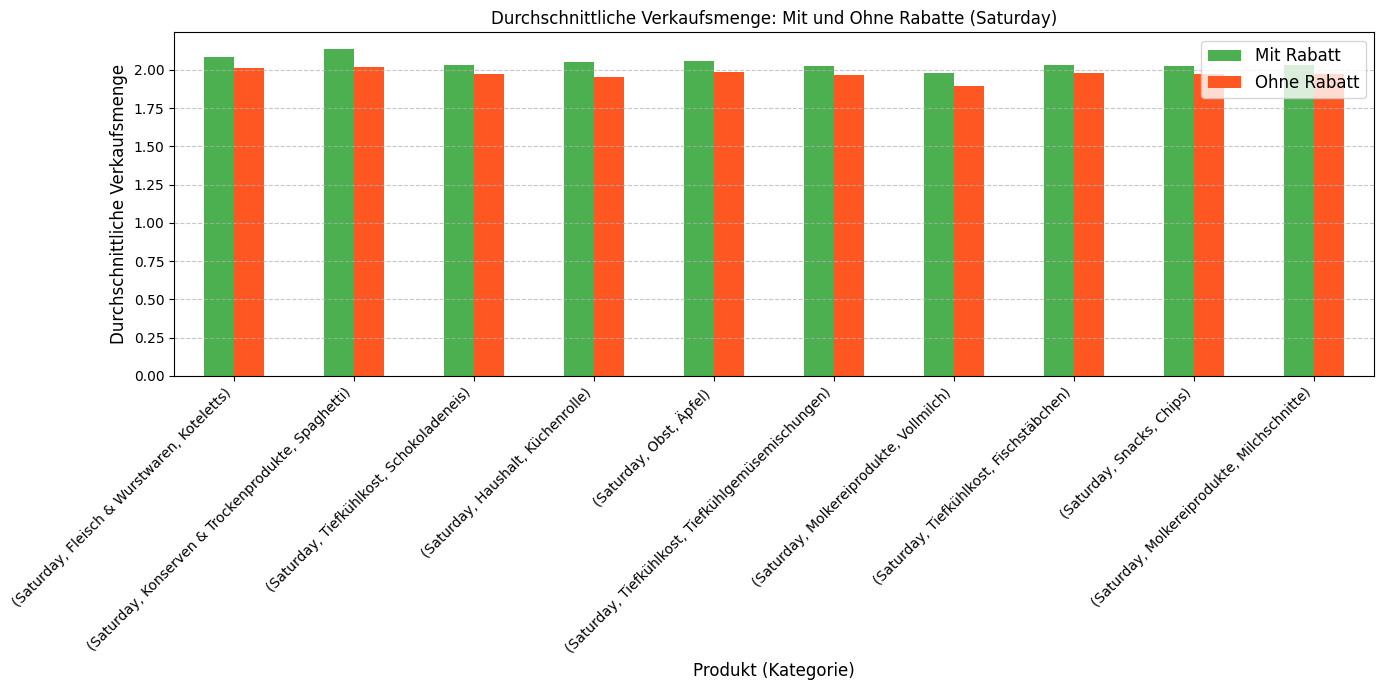

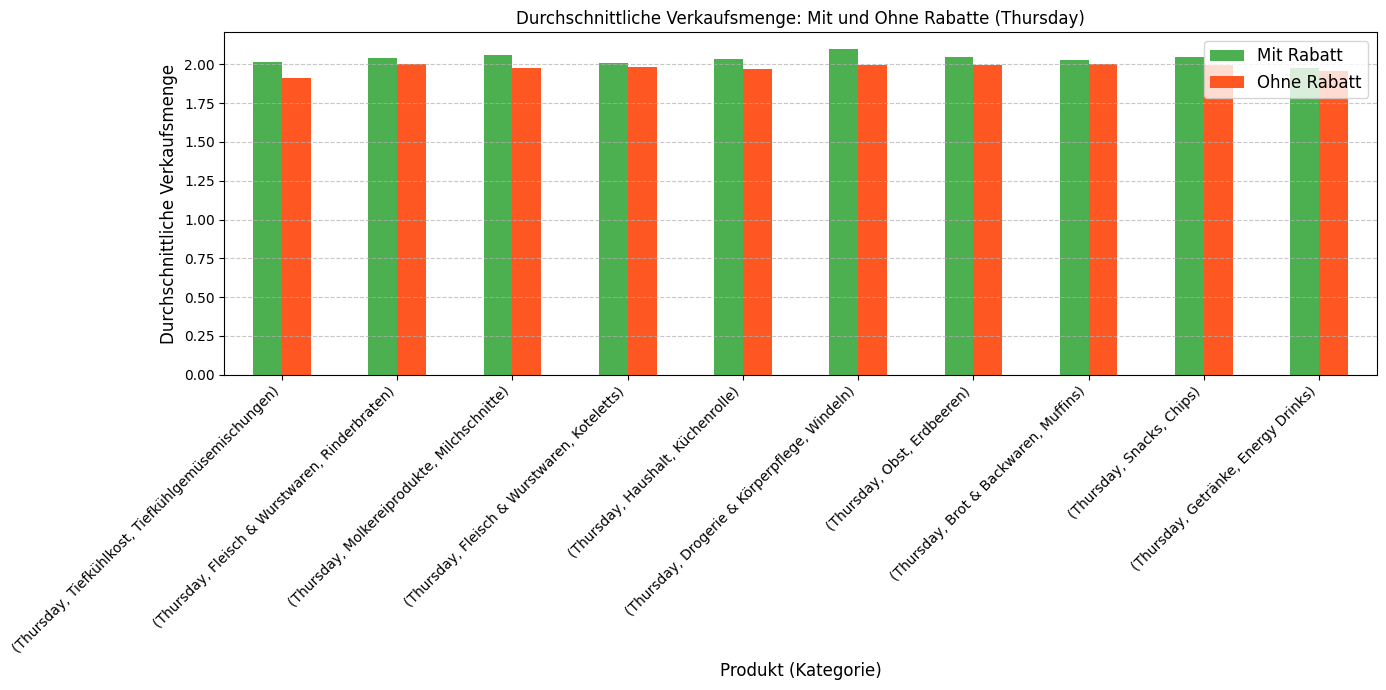

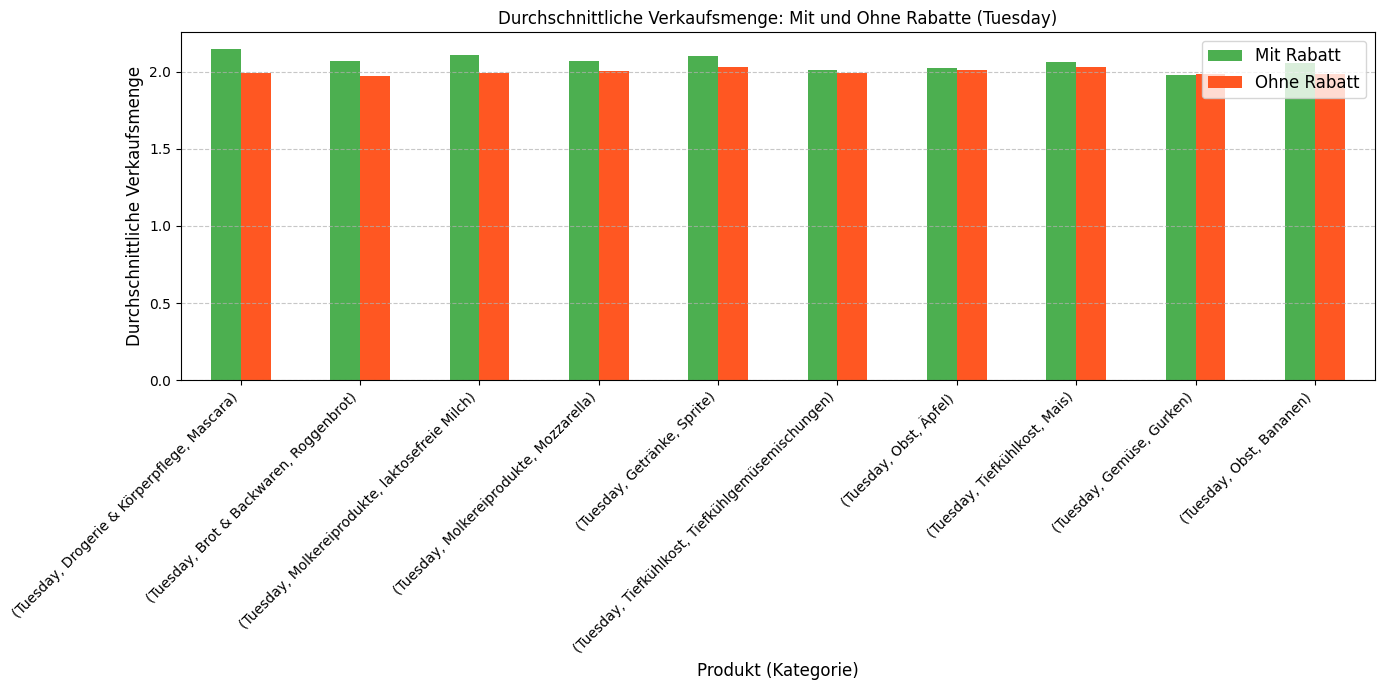

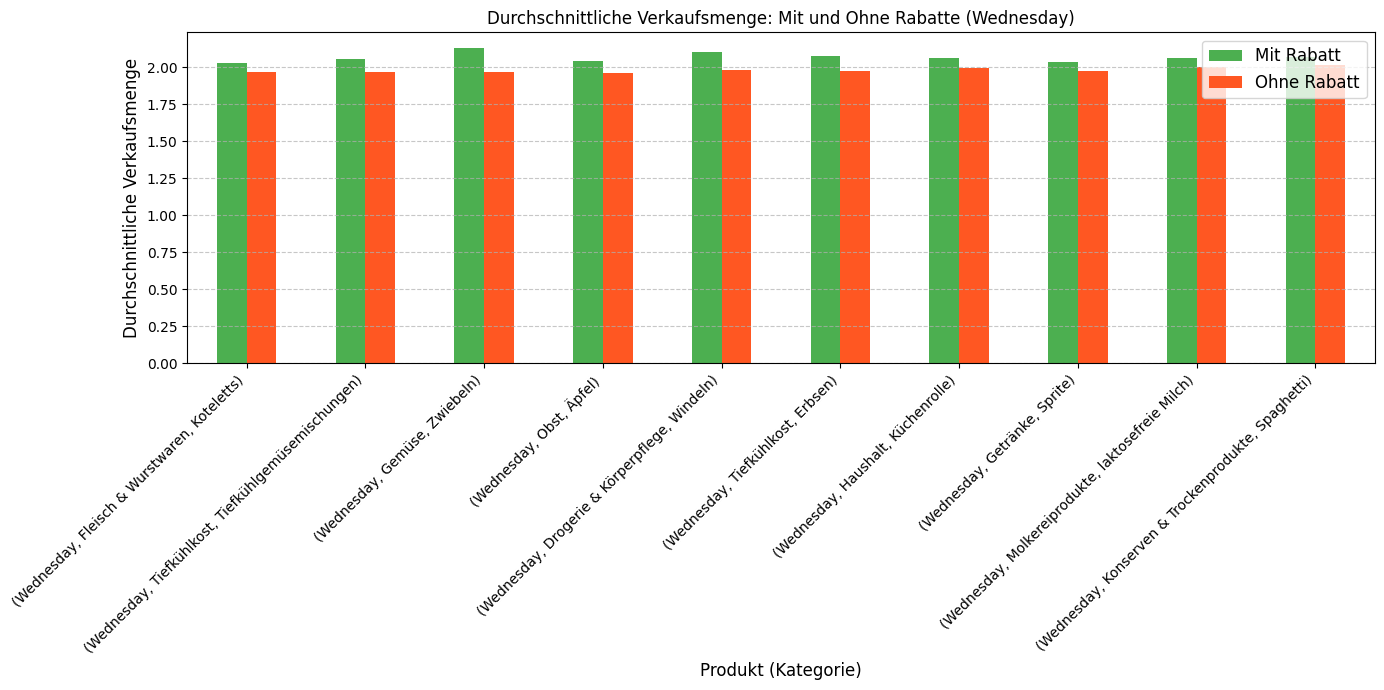

In [66]:
# Konvertiere "DateTime" zu Datum und Wochentag
df["Date"] = pd.to_datetime(df["DateTime"]).dt.date
df["Weekday"] = pd.to_datetime(df["DateTime"]).dt.day_name()

# Filtern der Daten mit und ohne Rabatt
df_with_discount = df[df["Discount Applied"] > 0]
df_without_discount = df[df["Discount Applied"] == 0]

# Gruppieren nach Wochentag, Produktkategorie und Produkt
# Berechnung des Durchschnitts für Beträge und Mengen
sales_with_discount_avg = df_with_discount.groupby(["Weekday", "Product Category", "Product Name"]).agg({
    "Total Amount": "mean",
    "Quantity Sold": "mean"
}).rename(columns={
    "Total Amount": "Average Discounted Sales",
    "Quantity Sold": "Average Discounted Quantity"
})

sales_without_discount_avg = df_without_discount.groupby(["Weekday", "Product Category", "Product Name"]).agg({
    "Total Amount": "mean",
    "Quantity Sold": "mean"
}).rename(columns={
    "Total Amount": "Average Non-Discounted Sales",
    "Quantity Sold": "Average Non-Discounted Quantity"
})

# Zusammenführen der Gruppen
sales_comparison_avg = sales_with_discount_avg.join(sales_without_discount_avg, how="outer").fillna(0)

# Berechnung der Differenzen
sales_comparison_avg["Sales Difference"] = (
    sales_comparison_avg["Average Discounted Sales"] - sales_comparison_avg["Average Non-Discounted Sales"]
)
sales_comparison_avg["Quantity Difference"] = (
    sales_comparison_avg["Average Discounted Quantity"] - sales_comparison_avg["Average Non-Discounted Quantity"]
)

# Ergebnisse sortieren
sales_comparison_avg_sorted = sales_comparison_avg.sort_values("Sales Difference", ascending=False)

# Visualisierung: Top-Produkte nach durchschnittlichem Unterschied
top_avg_products = sales_comparison_avg_sorted.groupby("Weekday").head(10)

# Plot 1: Durchschnittlicher Verkaufsbetrag pro Wochentag
for weekday, data in top_avg_products.groupby("Weekday"):
    data[["Average Discounted Sales", "Average Non-Discounted Sales"]].plot(
        kind="bar",
        figsize=(14, 7),
        color=["#4CAF50", "#FF5722"],
        title=f"Durchschnittlicher Verkaufsbetrag: Mit und Ohne Rabatte ({weekday})"
    )
    plt.xlabel("Produkt (Kategorie)", fontsize=12)
    plt.ylabel("Durchschnittlicher Verkaufsbetrag (in Euro)", fontsize=12)
    plt.legend(["Mit Rabatt", "Ohne Rabatt"], fontsize=12)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot 2: Durchschnittliche Verkaufsmenge pro Wochentag
for weekday, data in top_avg_products.groupby("Weekday"):
    data[["Average Discounted Quantity", "Average Non-Discounted Quantity"]].plot(
        kind="bar",
        figsize=(14, 7),
        color=["#4CAF50", "#FF5722"],
        title=f"Durchschnittliche Verkaufsmenge: Mit und Ohne Rabatte ({weekday})"
    )
    plt.xlabel("Produkt (Kategorie)", fontsize=12)
    plt.ylabel("Durchschnittliche Verkaufsmenge", fontsize=12)
    plt.legend(["Mit Rabatt", "Ohne Rabatt"], fontsize=12)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


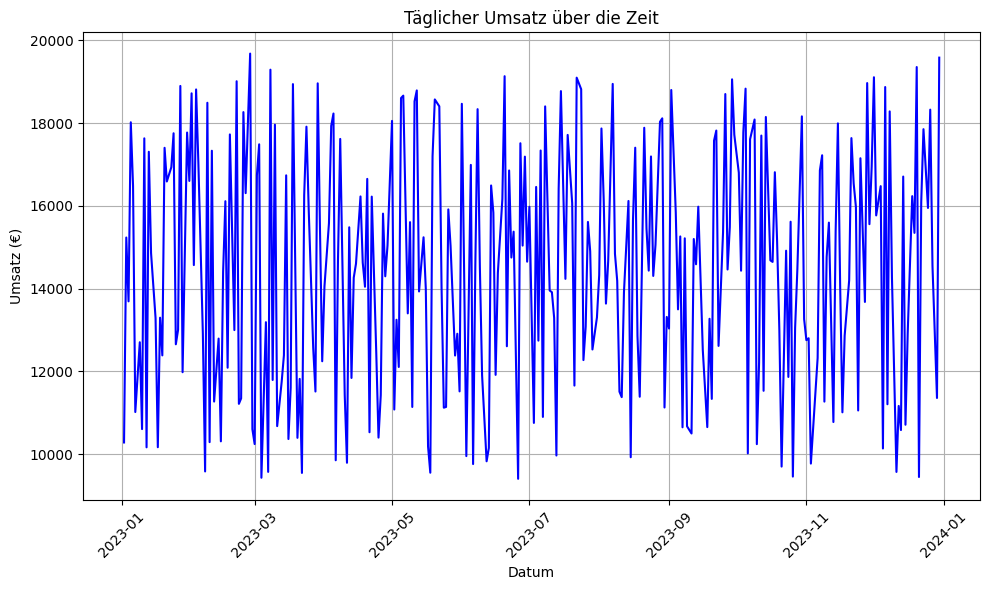

Mean Squared Error: 7794423.306739138
R^2 Score: -0.06808391527430002


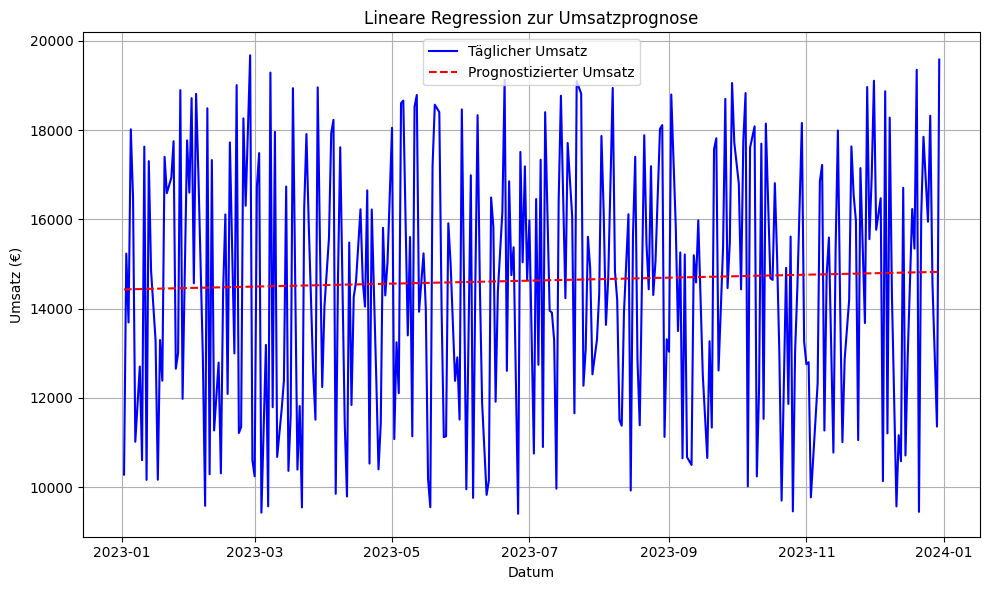

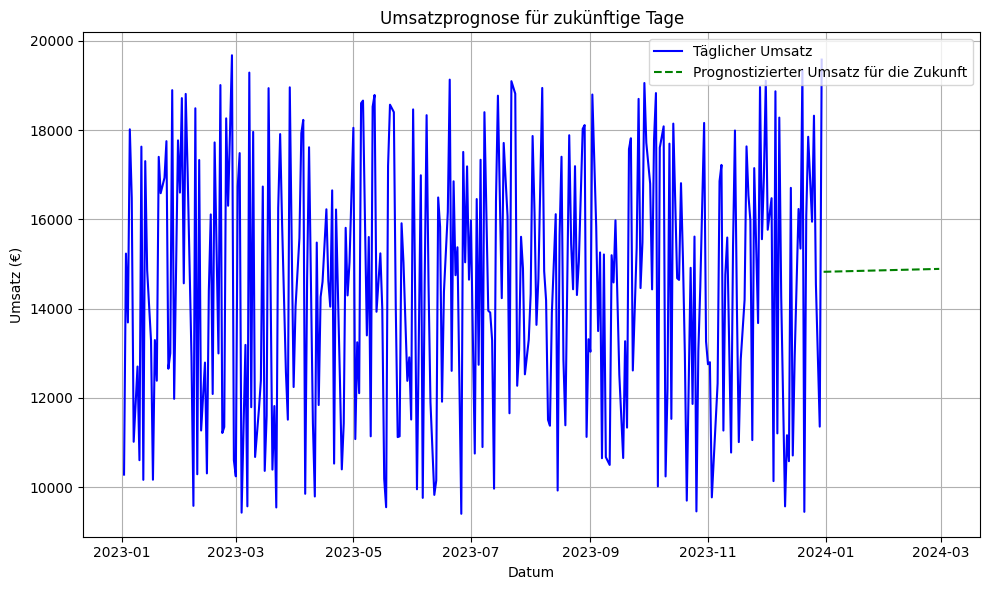

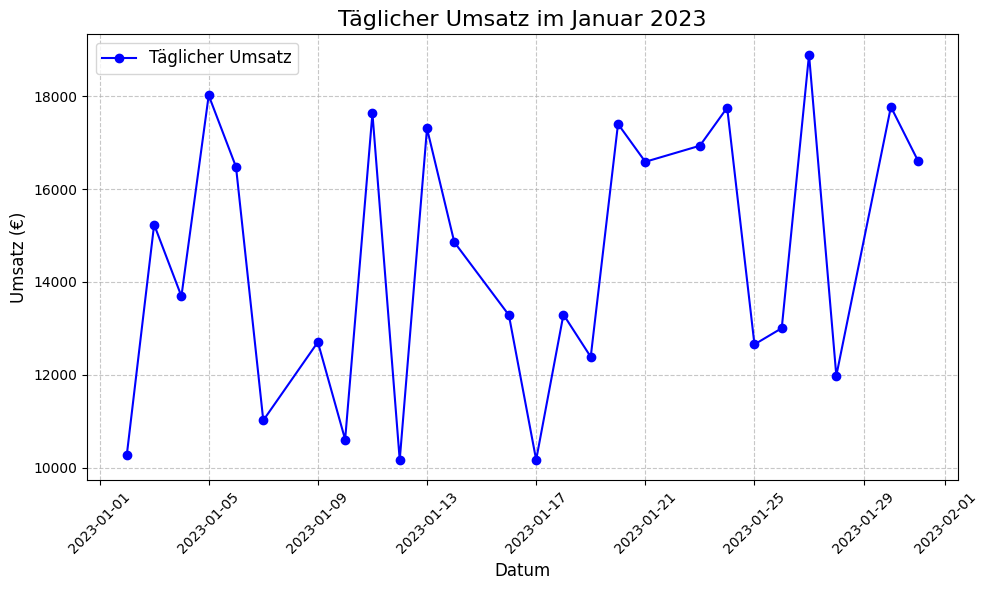

In [70]:
# Sicherstellen, dass die Daten keine fehlenden Werte enthalten
if df['DateTime'].isnull().any() or df['Total Amount'].isnull().any():
    raise ValueError("Die Spalten 'DateTime' oder 'Total Amount' enthalten fehlende Werte.")

# Aggregation: Täglicher Umsatz
df['Date'] = pd.to_datetime(df['DateTime']).dt.date
daily_sales = df.groupby('Date')['Total Amount'].sum().reset_index()

# Numerische Transformation: Tage seit Startdatum
start_date = daily_sales['Date'].min()
daily_sales['Date Numeric'] = (pd.to_datetime(daily_sales['Date']) - pd.to_datetime(start_date)).dt.days

# Visualisierung: Täglicher Umsatz
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Date'], daily_sales['Total Amount'], label='Täglicher Umsatz', color='blue')
plt.xlabel('Datum')
plt.ylabel('Umsatz (€)')
plt.title('Täglicher Umsatz über die Zeit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Lineare Regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Aufteilen in Trainings- und Testdaten
X = daily_sales[['Date Numeric']]
y = daily_sales['Total Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelltraining
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersage auf Testdaten
y_pred = model.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Prognose: Historische Werte
daily_sales['Predicted Sales'] = model.predict(X)

# Visualisierung: Tatsächlicher vs. Prognostizierter Umsatz
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Date'], daily_sales['Total Amount'], label='Täglicher Umsatz', color='blue')
plt.plot(daily_sales['Date'], daily_sales['Predicted Sales'], label='Prognostizierter Umsatz', color='red', linestyle='--')
plt.xlabel('Datum')
plt.ylabel('Umsatz (€)')
plt.title('Lineare Regression zur Umsatzprognose')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Prognose: Zukünftige Umsätze
future_days = pd.DataFrame({
    'Date Numeric': np.arange(daily_sales['Date Numeric'].max() + 1, daily_sales['Date Numeric'].max() + 62)
})
future_days['Date'] = pd.to_datetime(start_date) + pd.to_timedelta(future_days['Date Numeric'], unit='D')
future_days['Predicted Sales'] = model.predict(future_days[['Date Numeric']])

# Visualisierung: Zukunftsprognose
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Date'], daily_sales['Total Amount'], label='Täglicher Umsatz', color='blue')
plt.plot(future_days['Date'], future_days['Predicted Sales'], label='Prognostizierter Umsatz für die Zukunft', color='green', linestyle='--')
plt.xlabel('Datum')
plt.ylabel('Umsatz (€)')
plt.title('Umsatzprognose für zukünftige Tage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Sicherstellen, dass die 'DateTime'-Spalte im Datumsformat ist
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Filtere die Daten für Januar 2023
january_2023_sales = df[
    (df['DateTime'].dt.year == 2023) &
    (df['DateTime'].dt.month == 1)
]

# Aggregiere die Umsätze pro Tag für Januar 2023
january_2023_sales_daily = january_2023_sales.groupby(january_2023_sales['DateTime'].dt.date)['Total Amount'].sum()

# Visualisierung des täglichen Umsatzes im Januar 2023
plt.figure(figsize=(10, 6))
plt.plot(january_2023_sales_daily.index, january_2023_sales_daily.values, marker='o', color='blue', label='Täglicher Umsatz')
plt.title('Täglicher Umsatz im Januar 2023', fontsize=16)
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Umsatz (€)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()





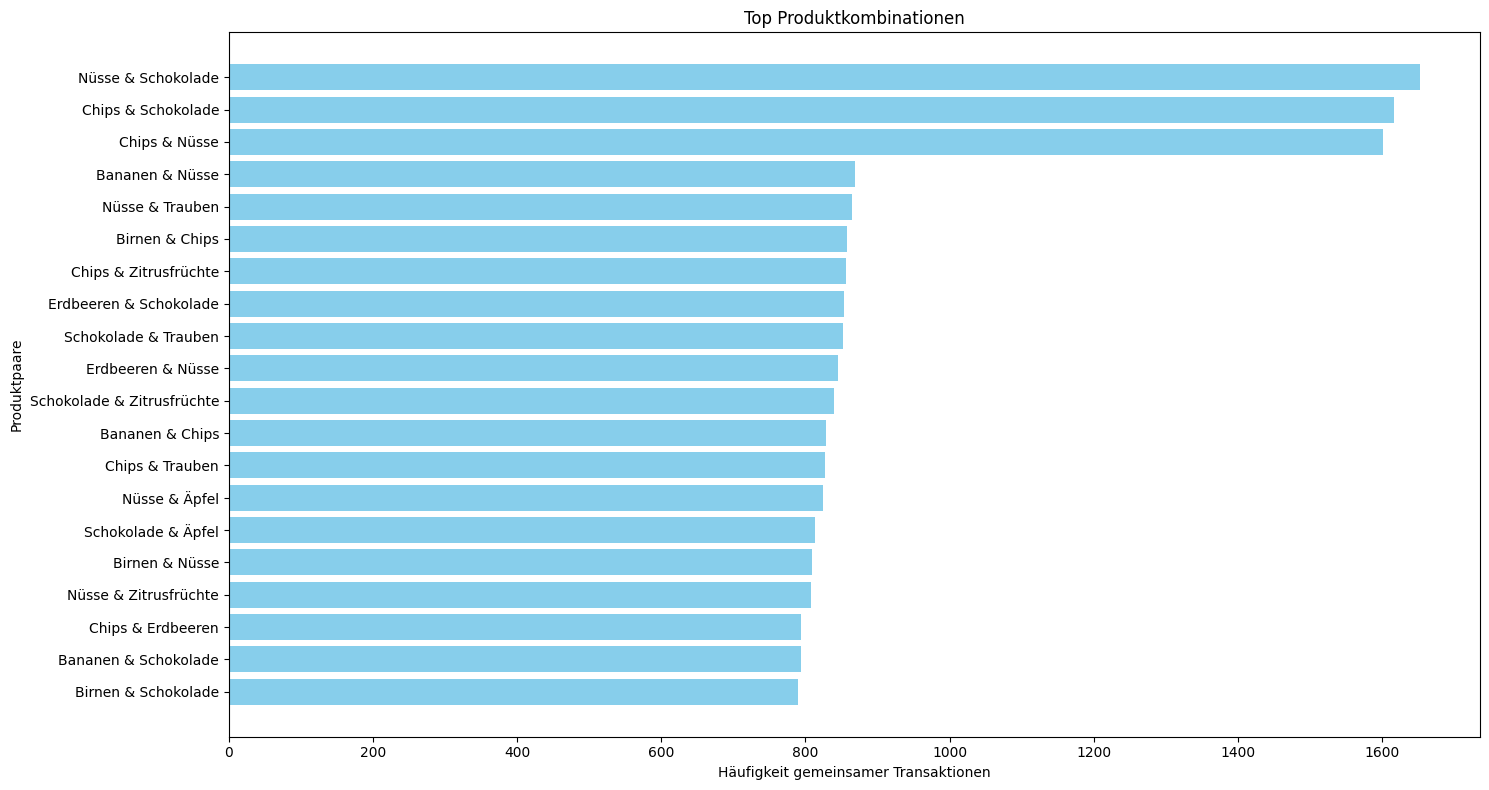


Top 20 Produktkombinationen:
       Product 1      Product 2  Count
260        Nüsse     Schokolade   1653
119        Chips     Schokolade   1616
551        Chips          Nüsse   1601
1197     Bananen          Nüsse    868
191        Nüsse        Trauben    865
881       Birnen          Chips    857
3160       Chips  Zitrusfrüchte    856
651    Erdbeeren     Schokolade    853
943   Schokolade        Trauben    852
368    Erdbeeren          Nüsse    845
360   Schokolade  Zitrusfrüchte    840
1536     Bananen          Chips    829
1636       Chips        Trauben    827
188        Nüsse          Äpfel    824
650   Schokolade          Äpfel    813
256       Birnen          Nüsse    809
2329       Nüsse  Zitrusfrüchte    808
1155       Chips      Erdbeeren    794
2508     Bananen     Schokolade    794
311       Birnen     Schokolade    790


In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

def calculate_co_occurrence(df):
    """
    Berechnet die Co-Occurrence-Matrix für Produkte basierend auf gemeinsamen Transaktionen.
    Führt symmetrische Paare (z. B. 'A & B' und 'B & A') zusammen.
    """
    # Gruppiere Produkte pro Transaktion
    product_pairs = df.groupby('Transaction ID')['Product Name'].apply(list)
    
    # Zähle Produktpaare als sortierte Tupel
    co_occ_counter = Counter()
    for transaction in product_pairs:
        pairs = combinations(set(transaction), 2)  # Verwende 'set', um doppelte Produkte zu vermeiden
        sorted_pairs = [tuple(sorted(pair)) for pair in pairs]  # Sortiere jedes Paar
        co_occ_counter.update(sorted_pairs)
    
    # Erstelle DataFrame für Co-Occurrences
    co_occurrence_list = [
        {"Product 1": p1, "Product 2": p2, "Count": count}
        for (p1, p2), count in co_occ_counter.items()
    ]
    co_occurrence_df = pd.DataFrame(co_occurrence_list)
    
    return co_occurrence_df

def visualize_top_co_occurrences(co_occurrence_df, top_n=20):
    """
    Visualisiert die Top-N häufigsten Produktpaare als Balkendiagramm.
    """
    # Sortiere nach Häufigkeit
    top_pairs = co_occurrence_df.nlargest(top_n, "Count")
    
    # Visualisierung
    plt.figure(figsize=(15, 8))
    plt.barh(
        [f"{row['Product 1']} & {row['Product 2']}" for _, row in top_pairs.iterrows()], 
        top_pairs["Count"],
        color='skyblue'
    )
    plt.gca().invert_yaxis()
    plt.title("Top Produktkombinationen")
    plt.xlabel("Häufigkeit gemeinsamer Transaktionen")
    plt.ylabel("Produktpaare")
    plt.tight_layout()
    plt.show()
    
    return top_pairs

def analyze_co_occurrences(df):
    """
    Führt die Analyse der Co-Occurrence-Matrix durch und gibt die Ergebnisse aus.
    """
    # Berechnung der Co-Occurrence-Matrix
    co_occurrence_df = calculate_co_occurrence(df)
    
    # Visualisierung und Top-Kombinationen
    top_combinations = visualize_top_co_occurrences(co_occurrence_df)
    
    # Ergebnisse speichern und ausgeben
    co_occurrence_df.to_csv('co_occurrence_pairs.csv', index=False)
    print("\nTop 20 Produktkombinationen:")
    print(top_combinations)
    
    return co_occurrence_df, top_combinations

# Hauptausführung
df = pd.read_csv("aldi_sales_data.csv", encoding='utf-8')
co_occurrence_df, top_combinations = analyze_co_occurrences(df)



Gesamtzahl aller Transaktionen: 237226

Kategorie Snacks:
Anzahl Transaktionen: 57541
Prozent aller Transaktionen: 24.26%


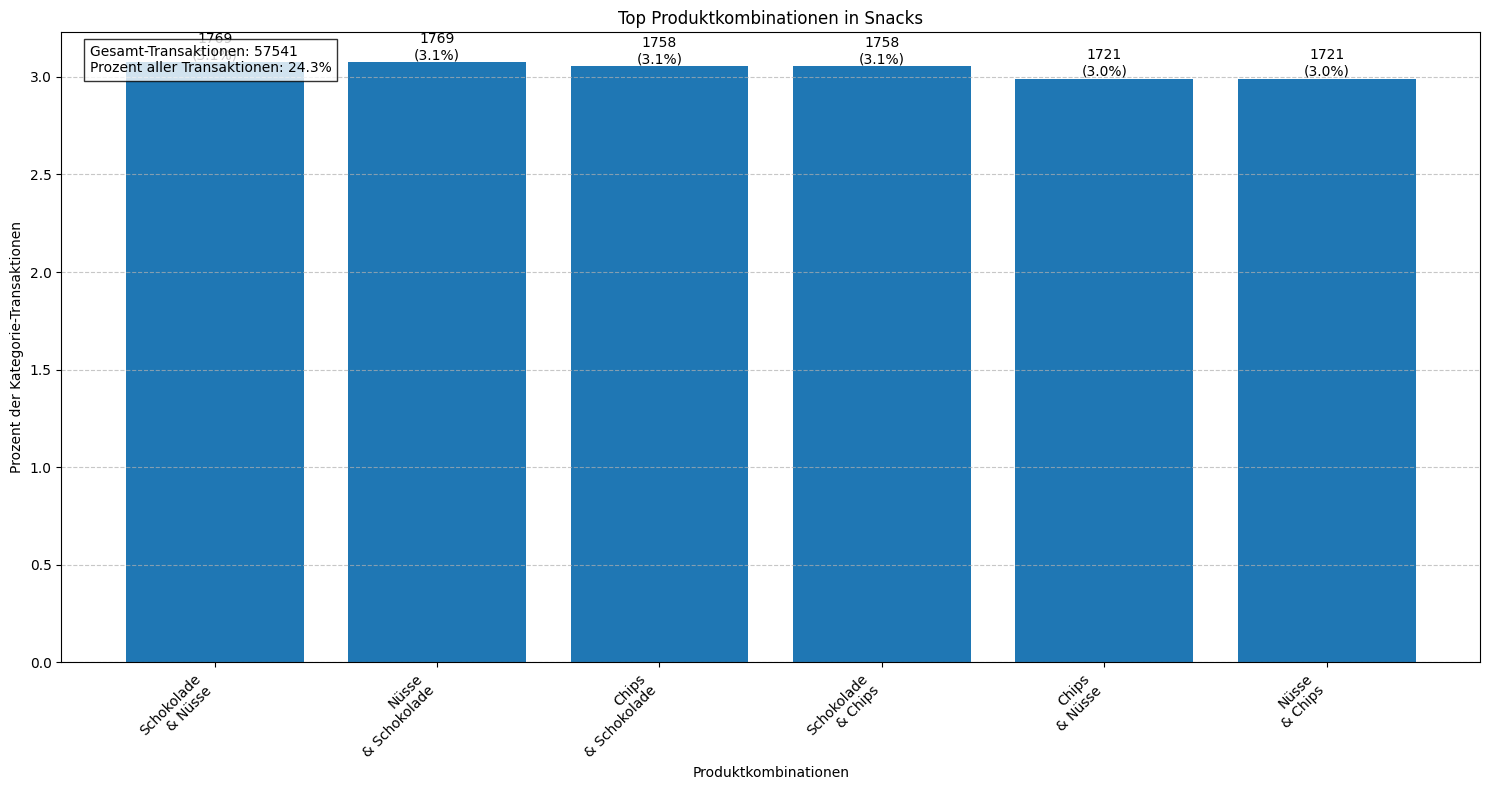


Top Produktkombinationen für Snacks:
Schokolade & Nüsse: 1769 gemeinsame Transaktionen (3.07% der Kategorie-Transaktionen, 0.75% aller Transaktionen)
Nüsse & Schokolade: 1769 gemeinsame Transaktionen (3.07% der Kategorie-Transaktionen, 0.75% aller Transaktionen)
Chips & Schokolade: 1758 gemeinsame Transaktionen (3.06% der Kategorie-Transaktionen, 0.74% aller Transaktionen)
Schokolade & Chips: 1758 gemeinsame Transaktionen (3.06% der Kategorie-Transaktionen, 0.74% aller Transaktionen)
Chips & Nüsse: 1721 gemeinsame Transaktionen (2.99% der Kategorie-Transaktionen, 0.73% aller Transaktionen)
Nüsse & Chips: 1721 gemeinsame Transaktionen (2.99% der Kategorie-Transaktionen, 0.73% aller Transaktionen)

Kategorie Gemüse:
Anzahl Transaktionen: 57396
Prozent aller Transaktionen: 24.19%


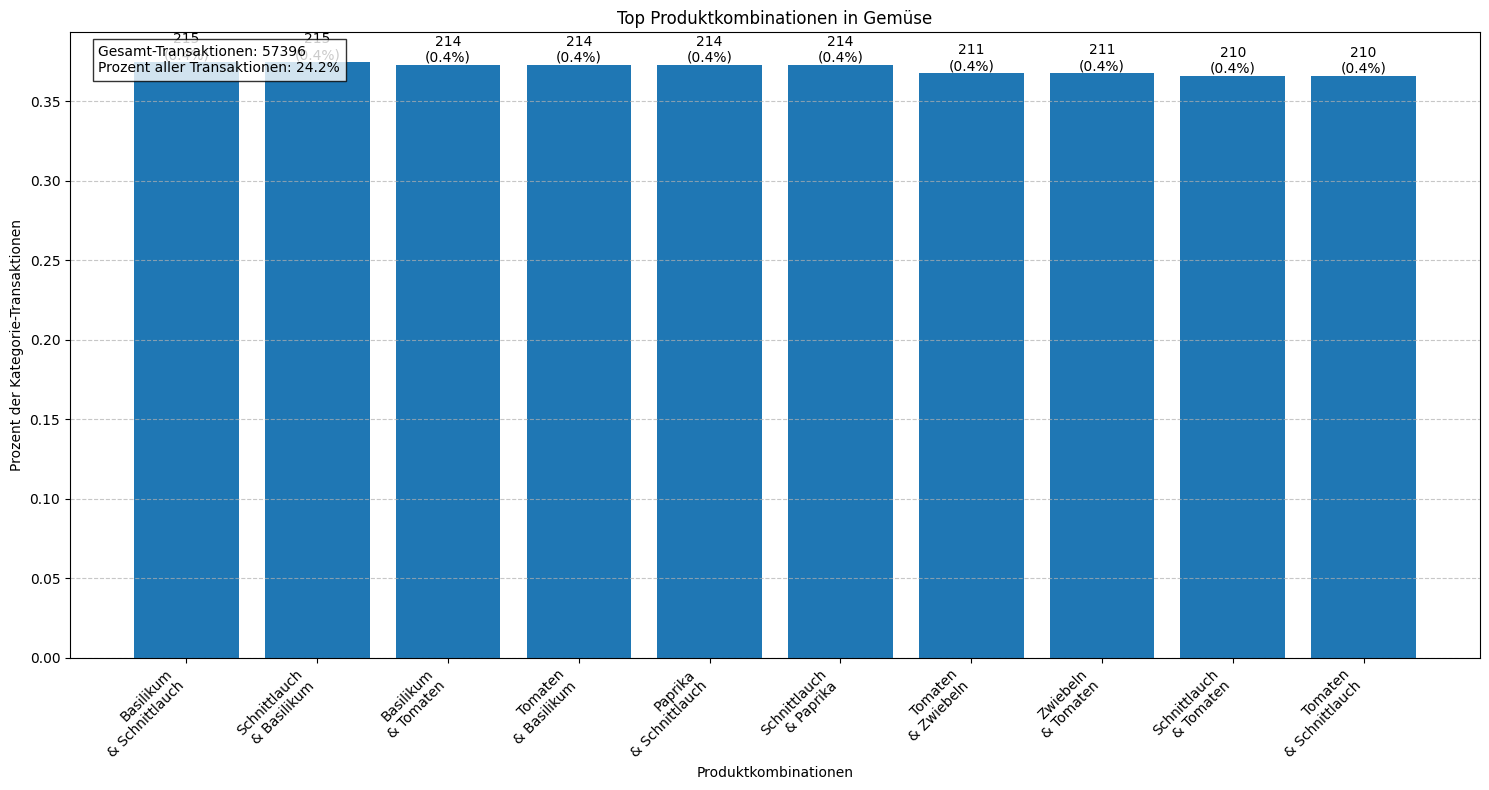


Top Produktkombinationen für Gemüse:
Basilikum & Schnittlauch: 215 gemeinsame Transaktionen (0.37% der Kategorie-Transaktionen, 0.09% aller Transaktionen)
Schnittlauch & Basilikum: 215 gemeinsame Transaktionen (0.37% der Kategorie-Transaktionen, 0.09% aller Transaktionen)
Basilikum & Tomaten: 214 gemeinsame Transaktionen (0.37% der Kategorie-Transaktionen, 0.09% aller Transaktionen)
Tomaten & Basilikum: 214 gemeinsame Transaktionen (0.37% der Kategorie-Transaktionen, 0.09% aller Transaktionen)
Paprika & Schnittlauch: 214 gemeinsame Transaktionen (0.37% der Kategorie-Transaktionen, 0.09% aller Transaktionen)
Schnittlauch & Paprika: 214 gemeinsame Transaktionen (0.37% der Kategorie-Transaktionen, 0.09% aller Transaktionen)
Tomaten & Zwiebeln: 211 gemeinsame Transaktionen (0.37% der Kategorie-Transaktionen, 0.09% aller Transaktionen)
Zwiebeln & Tomaten: 211 gemeinsame Transaktionen (0.37% der Kategorie-Transaktionen, 0.09% aller Transaktionen)
Schnittlauch & Tomaten: 210 gemeinsame Trans

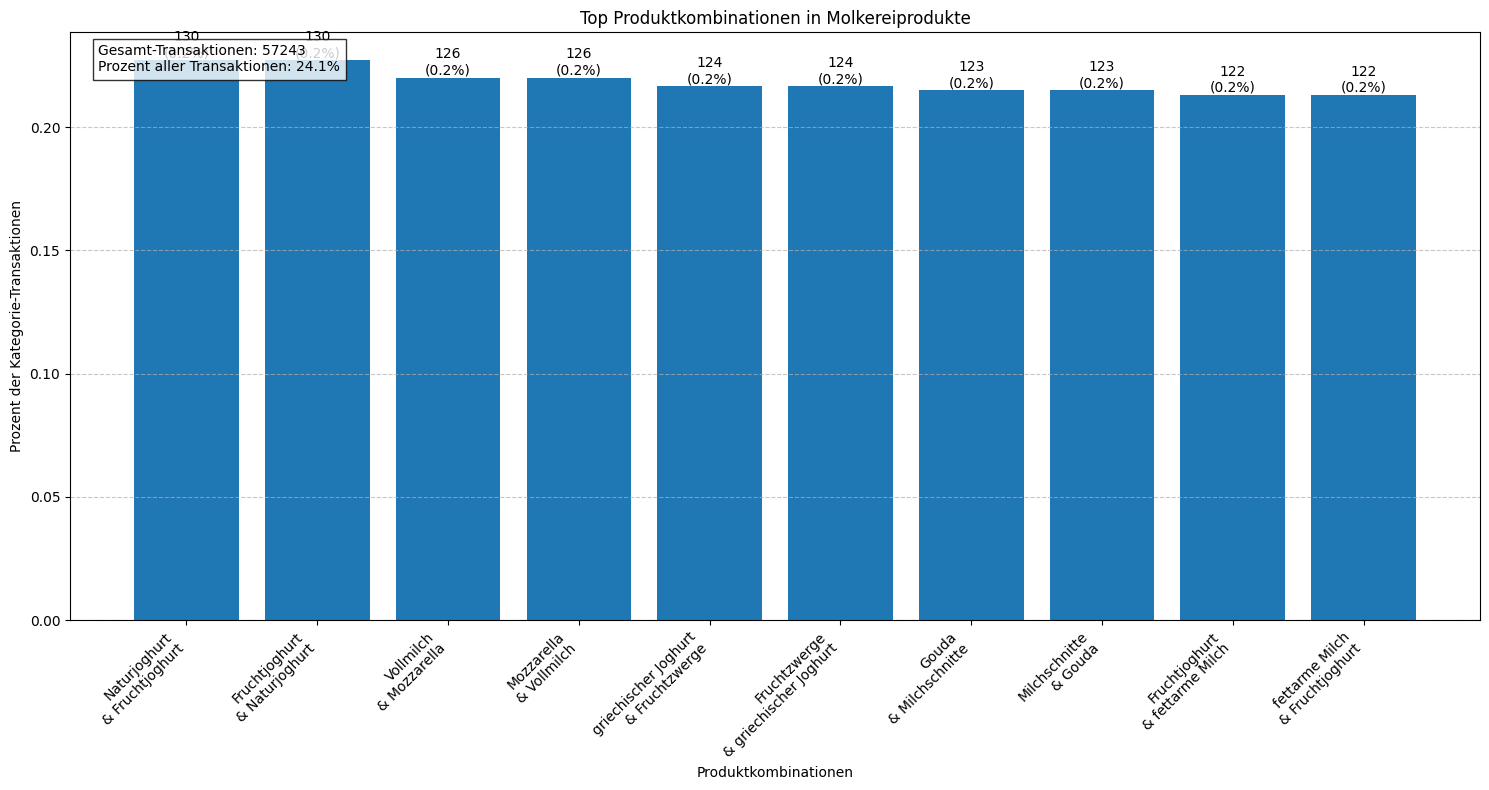


Top Produktkombinationen für Molkereiprodukte:
Naturjoghurt & Fruchtjoghurt: 130 gemeinsame Transaktionen (0.23% der Kategorie-Transaktionen, 0.05% aller Transaktionen)
Fruchtjoghurt & Naturjoghurt: 130 gemeinsame Transaktionen (0.23% der Kategorie-Transaktionen, 0.05% aller Transaktionen)
Vollmilch & Mozzarella: 126 gemeinsame Transaktionen (0.22% der Kategorie-Transaktionen, 0.05% aller Transaktionen)
Mozzarella & Vollmilch: 126 gemeinsame Transaktionen (0.22% der Kategorie-Transaktionen, 0.05% aller Transaktionen)
griechischer Joghurt & Fruchtzwerge: 124 gemeinsame Transaktionen (0.22% der Kategorie-Transaktionen, 0.05% aller Transaktionen)
Fruchtzwerge & griechischer Joghurt: 124 gemeinsame Transaktionen (0.22% der Kategorie-Transaktionen, 0.05% aller Transaktionen)
Gouda & Milchschnitte: 123 gemeinsame Transaktionen (0.21% der Kategorie-Transaktionen, 0.05% aller Transaktionen)
Milchschnitte & Gouda: 123 gemeinsame Transaktionen (0.21% der Kategorie-Transaktionen, 0.05% aller Tra

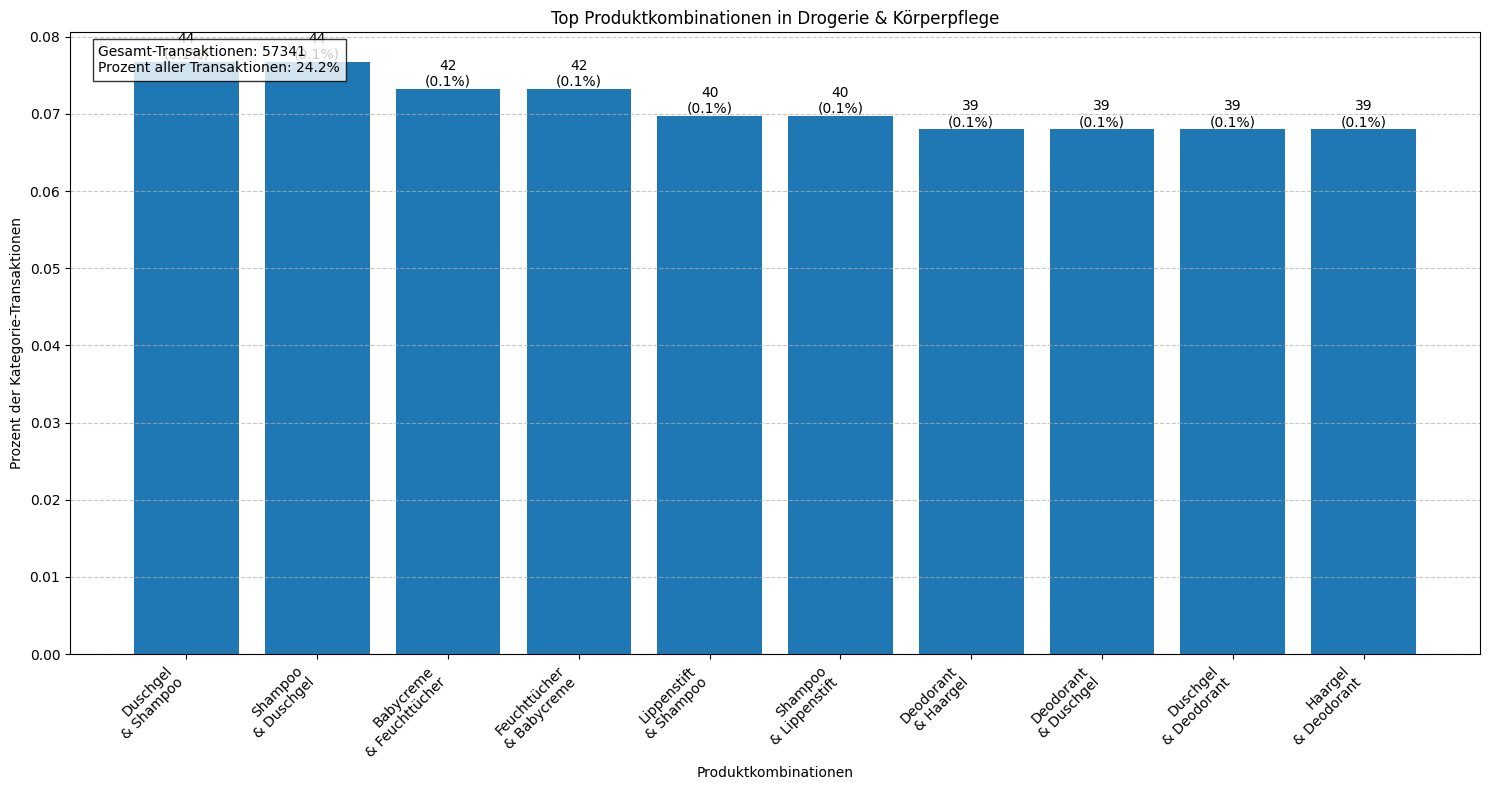


Top Produktkombinationen für Drogerie & Körperpflege:
Duschgel & Shampoo: 44 gemeinsame Transaktionen (0.08% der Kategorie-Transaktionen, 0.02% aller Transaktionen)
Shampoo & Duschgel: 44 gemeinsame Transaktionen (0.08% der Kategorie-Transaktionen, 0.02% aller Transaktionen)
Babycreme & Feuchttücher: 42 gemeinsame Transaktionen (0.07% der Kategorie-Transaktionen, 0.02% aller Transaktionen)
Feuchttücher & Babycreme: 42 gemeinsame Transaktionen (0.07% der Kategorie-Transaktionen, 0.02% aller Transaktionen)
Lippenstift & Shampoo: 40 gemeinsame Transaktionen (0.07% der Kategorie-Transaktionen, 0.02% aller Transaktionen)
Shampoo & Lippenstift: 40 gemeinsame Transaktionen (0.07% der Kategorie-Transaktionen, 0.02% aller Transaktionen)
Deodorant & Haargel: 39 gemeinsame Transaktionen (0.07% der Kategorie-Transaktionen, 0.02% aller Transaktionen)
Deodorant & Duschgel: 39 gemeinsame Transaktionen (0.07% der Kategorie-Transaktionen, 0.02% aller Transaktionen)
Duschgel & Deodorant: 39 gemeinsame 

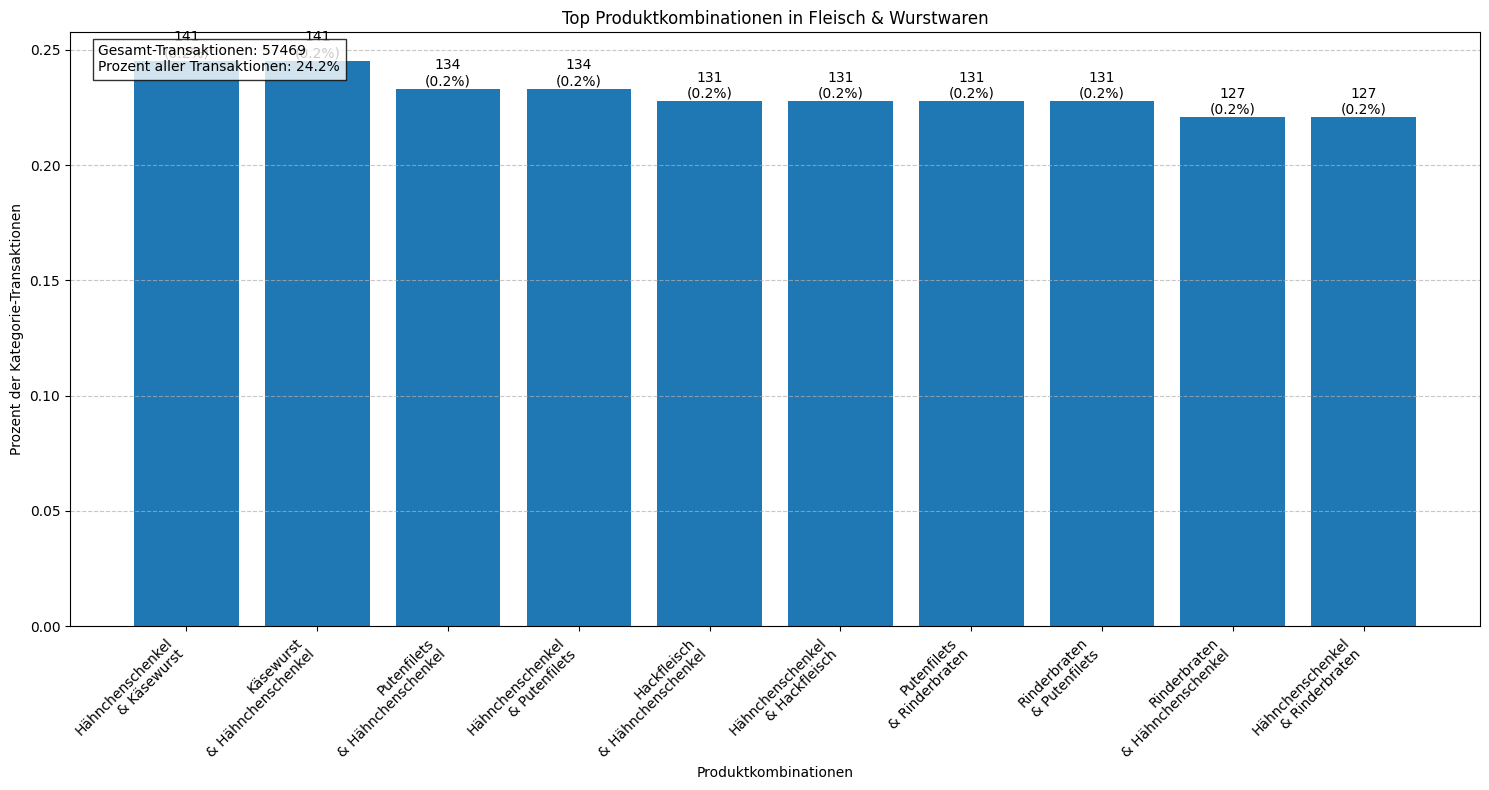


Top Produktkombinationen für Fleisch & Wurstwaren:
Hähnchenschenkel & Käsewurst: 141 gemeinsame Transaktionen (0.25% der Kategorie-Transaktionen, 0.06% aller Transaktionen)
Käsewurst & Hähnchenschenkel: 141 gemeinsame Transaktionen (0.25% der Kategorie-Transaktionen, 0.06% aller Transaktionen)
Putenfilets & Hähnchenschenkel: 134 gemeinsame Transaktionen (0.23% der Kategorie-Transaktionen, 0.06% aller Transaktionen)
Hähnchenschenkel & Putenfilets: 134 gemeinsame Transaktionen (0.23% der Kategorie-Transaktionen, 0.06% aller Transaktionen)
Hackfleisch & Hähnchenschenkel: 131 gemeinsame Transaktionen (0.23% der Kategorie-Transaktionen, 0.06% aller Transaktionen)
Hähnchenschenkel & Hackfleisch: 131 gemeinsame Transaktionen (0.23% der Kategorie-Transaktionen, 0.06% aller Transaktionen)
Putenfilets & Rinderbraten: 131 gemeinsame Transaktionen (0.23% der Kategorie-Transaktionen, 0.06% aller Transaktionen)
Rinderbraten & Putenfilets: 131 gemeinsame Transaktionen (0.23% der Kategorie-Transaktio

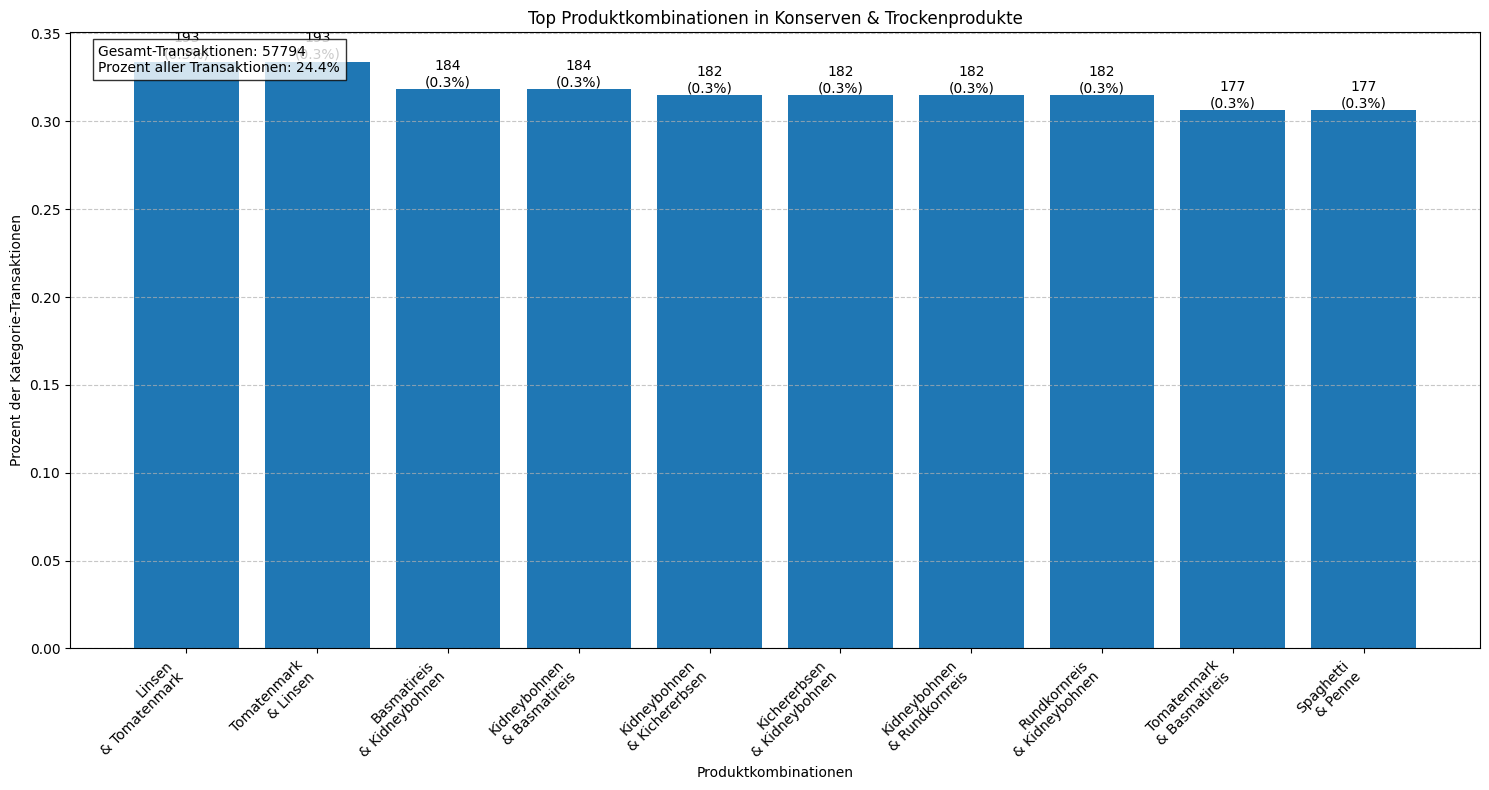


Top Produktkombinationen für Konserven & Trockenprodukte:
Linsen & Tomatenmark: 193 gemeinsame Transaktionen (0.33% der Kategorie-Transaktionen, 0.08% aller Transaktionen)
Tomatenmark & Linsen: 193 gemeinsame Transaktionen (0.33% der Kategorie-Transaktionen, 0.08% aller Transaktionen)
Basmatireis & Kidneybohnen: 184 gemeinsame Transaktionen (0.32% der Kategorie-Transaktionen, 0.08% aller Transaktionen)
Kidneybohnen & Basmatireis: 184 gemeinsame Transaktionen (0.32% der Kategorie-Transaktionen, 0.08% aller Transaktionen)
Kidneybohnen & Kichererbsen: 182 gemeinsame Transaktionen (0.31% der Kategorie-Transaktionen, 0.08% aller Transaktionen)
Kichererbsen & Kidneybohnen: 182 gemeinsame Transaktionen (0.31% der Kategorie-Transaktionen, 0.08% aller Transaktionen)
Kidneybohnen & Rundkornreis: 182 gemeinsame Transaktionen (0.31% der Kategorie-Transaktionen, 0.08% aller Transaktionen)
Rundkornreis & Kidneybohnen: 182 gemeinsame Transaktionen (0.31% der Kategorie-Transaktionen, 0.08% aller Tran

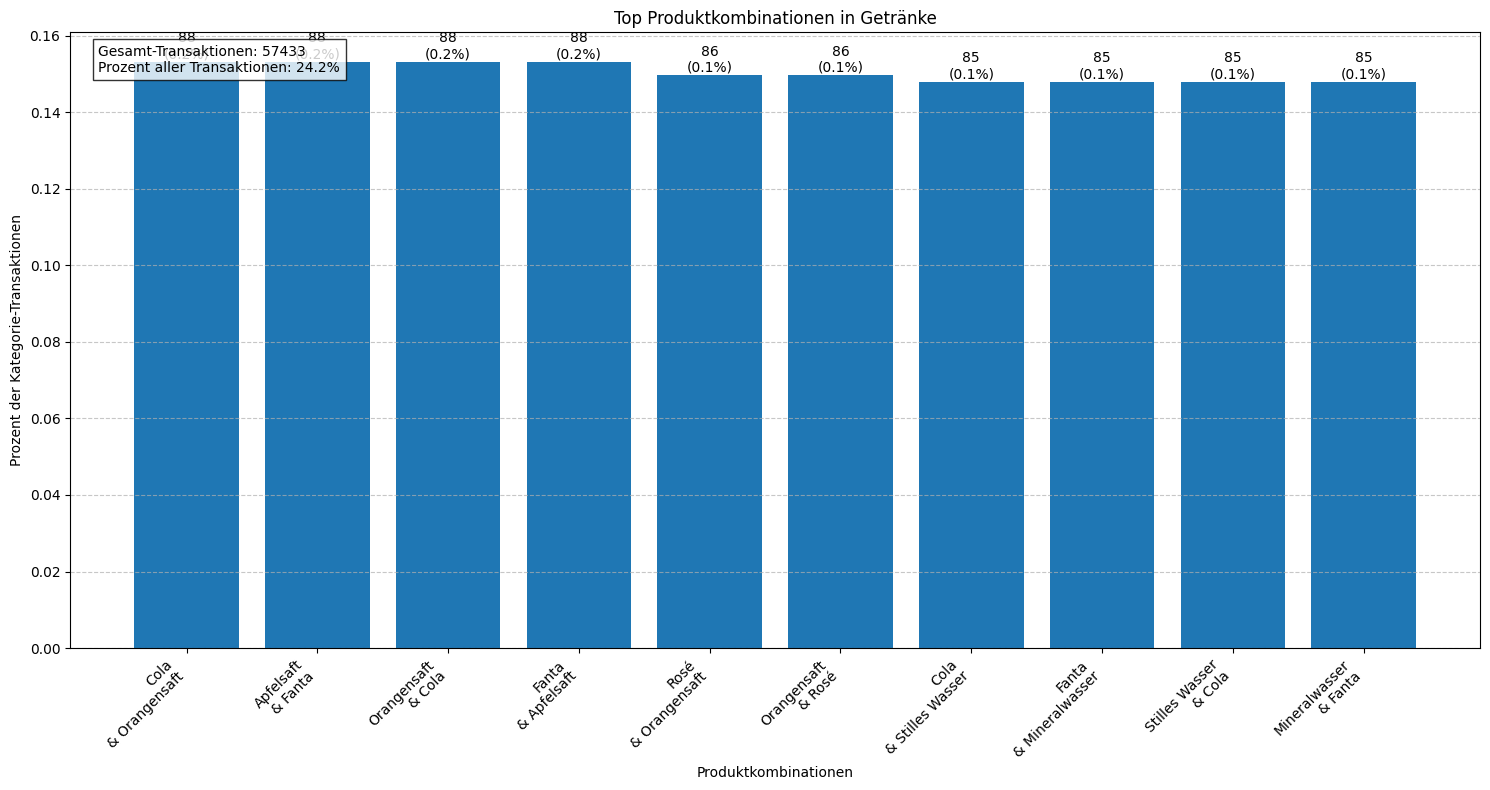


Top Produktkombinationen für Getränke:
Cola & Orangensaft: 88 gemeinsame Transaktionen (0.15% der Kategorie-Transaktionen, 0.04% aller Transaktionen)
Apfelsaft & Fanta: 88 gemeinsame Transaktionen (0.15% der Kategorie-Transaktionen, 0.04% aller Transaktionen)
Orangensaft & Cola: 88 gemeinsame Transaktionen (0.15% der Kategorie-Transaktionen, 0.04% aller Transaktionen)
Fanta & Apfelsaft: 88 gemeinsame Transaktionen (0.15% der Kategorie-Transaktionen, 0.04% aller Transaktionen)
Rosé & Orangensaft: 86 gemeinsame Transaktionen (0.15% der Kategorie-Transaktionen, 0.04% aller Transaktionen)
Orangensaft & Rosé: 86 gemeinsame Transaktionen (0.15% der Kategorie-Transaktionen, 0.04% aller Transaktionen)
Cola & Stilles Wasser: 85 gemeinsame Transaktionen (0.15% der Kategorie-Transaktionen, 0.04% aller Transaktionen)
Fanta & Mineralwasser: 85 gemeinsame Transaktionen (0.15% der Kategorie-Transaktionen, 0.04% aller Transaktionen)
Stilles Wasser & Cola: 85 gemeinsame Transaktionen (0.15% der Katego

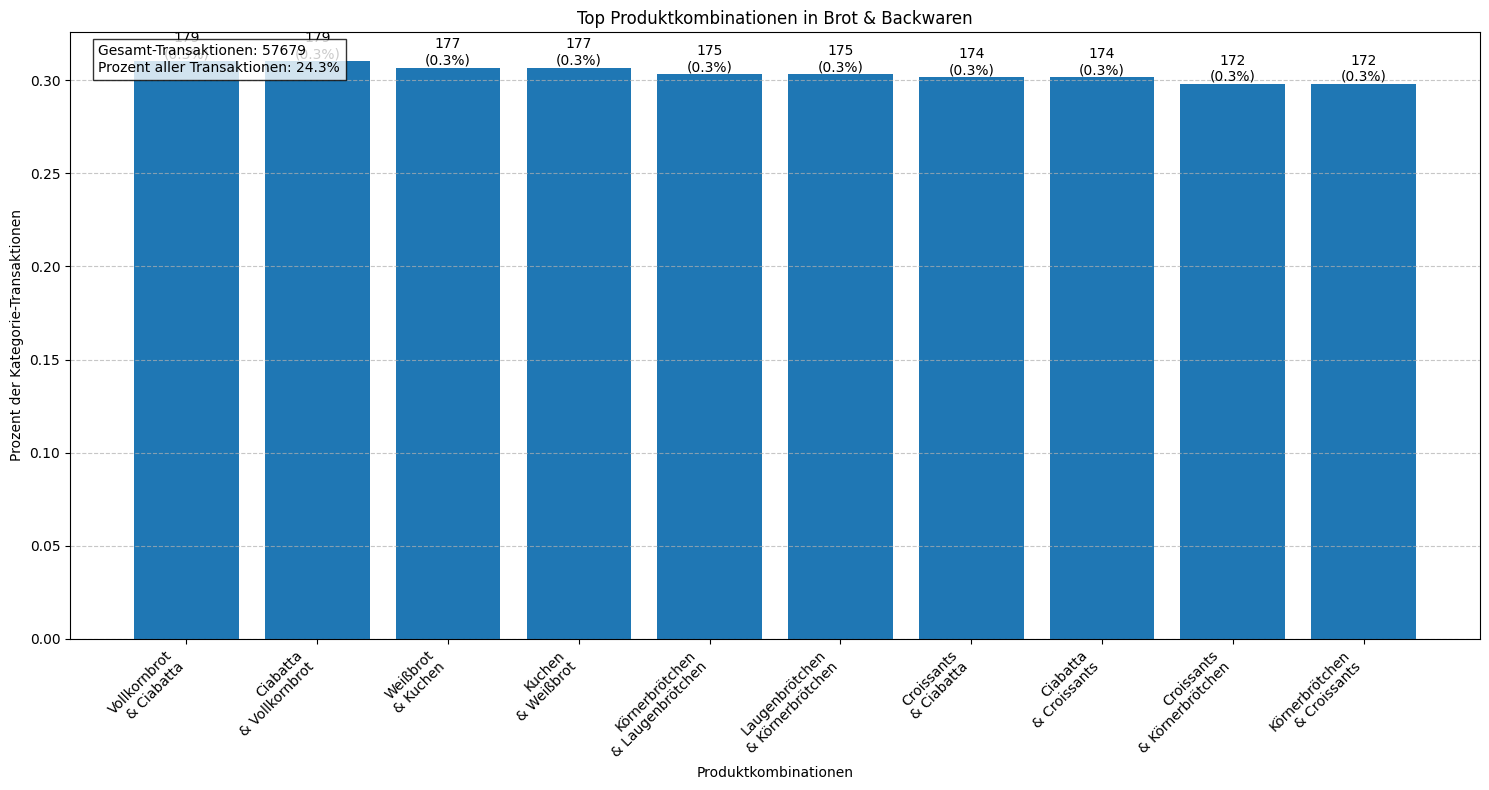


Top Produktkombinationen für Brot & Backwaren:
Vollkornbrot & Ciabatta: 179 gemeinsame Transaktionen (0.31% der Kategorie-Transaktionen, 0.08% aller Transaktionen)
Ciabatta & Vollkornbrot: 179 gemeinsame Transaktionen (0.31% der Kategorie-Transaktionen, 0.08% aller Transaktionen)
Weißbrot & Kuchen: 177 gemeinsame Transaktionen (0.31% der Kategorie-Transaktionen, 0.07% aller Transaktionen)
Kuchen & Weißbrot: 177 gemeinsame Transaktionen (0.31% der Kategorie-Transaktionen, 0.07% aller Transaktionen)
Körnerbrötchen & Laugenbrötchen: 175 gemeinsame Transaktionen (0.30% der Kategorie-Transaktionen, 0.07% aller Transaktionen)
Laugenbrötchen & Körnerbrötchen: 175 gemeinsame Transaktionen (0.30% der Kategorie-Transaktionen, 0.07% aller Transaktionen)
Croissants & Ciabatta: 174 gemeinsame Transaktionen (0.30% der Kategorie-Transaktionen, 0.07% aller Transaktionen)
Ciabatta & Croissants: 174 gemeinsame Transaktionen (0.30% der Kategorie-Transaktionen, 0.07% aller Transaktionen)
Croissants & Kör

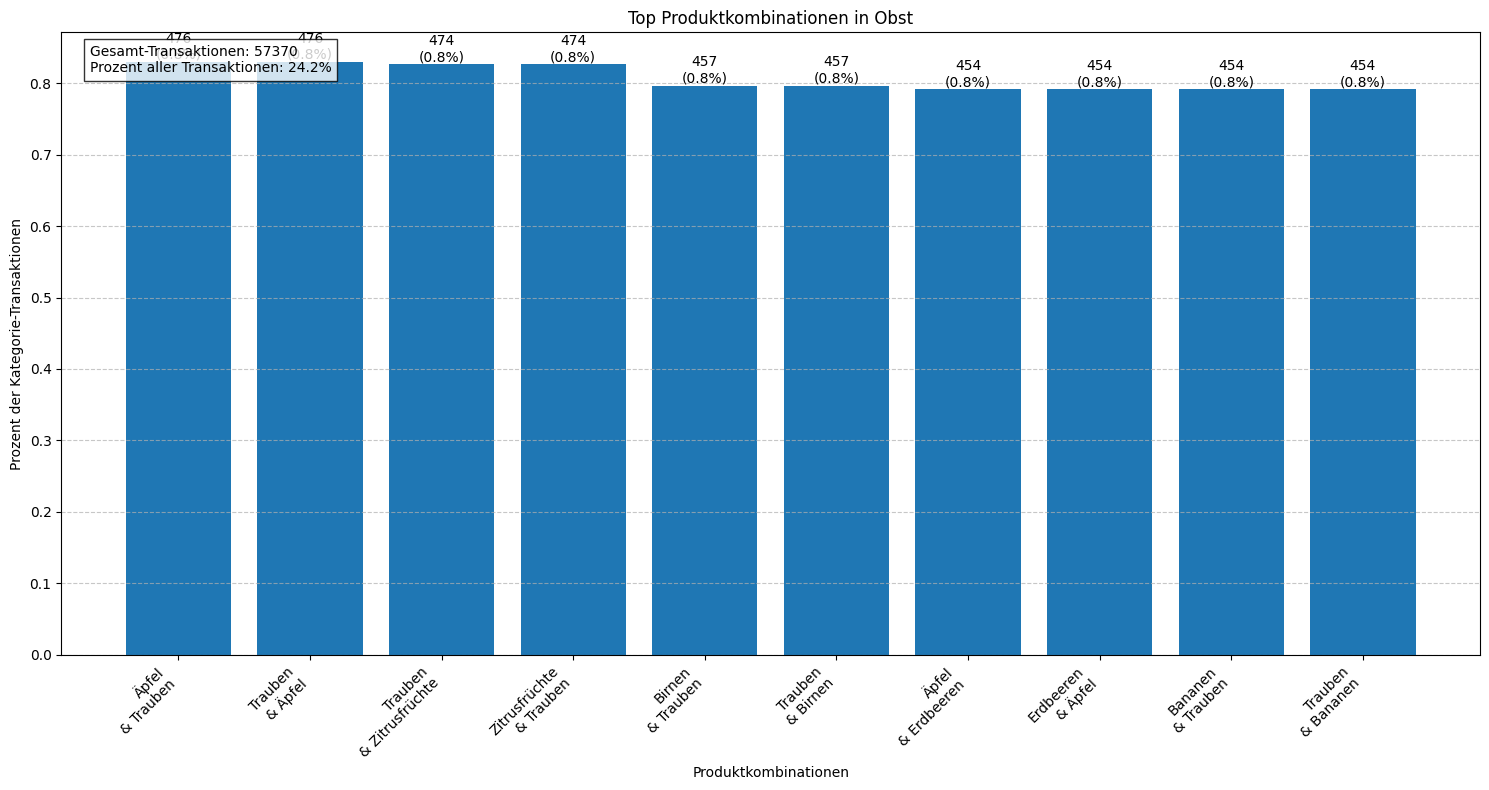


Top Produktkombinationen für Obst:
Äpfel & Trauben: 476 gemeinsame Transaktionen (0.83% der Kategorie-Transaktionen, 0.20% aller Transaktionen)
Trauben & Äpfel: 476 gemeinsame Transaktionen (0.83% der Kategorie-Transaktionen, 0.20% aller Transaktionen)
Trauben & Zitrusfrüchte: 474 gemeinsame Transaktionen (0.83% der Kategorie-Transaktionen, 0.20% aller Transaktionen)
Zitrusfrüchte & Trauben: 474 gemeinsame Transaktionen (0.83% der Kategorie-Transaktionen, 0.20% aller Transaktionen)
Birnen & Trauben: 457 gemeinsame Transaktionen (0.80% der Kategorie-Transaktionen, 0.19% aller Transaktionen)
Trauben & Birnen: 457 gemeinsame Transaktionen (0.80% der Kategorie-Transaktionen, 0.19% aller Transaktionen)
Äpfel & Erdbeeren: 454 gemeinsame Transaktionen (0.79% der Kategorie-Transaktionen, 0.19% aller Transaktionen)
Erdbeeren & Äpfel: 454 gemeinsame Transaktionen (0.79% der Kategorie-Transaktionen, 0.19% aller Transaktionen)
Bananen & Trauben: 454 gemeinsame Transaktionen (0.79% der Kategorie-T

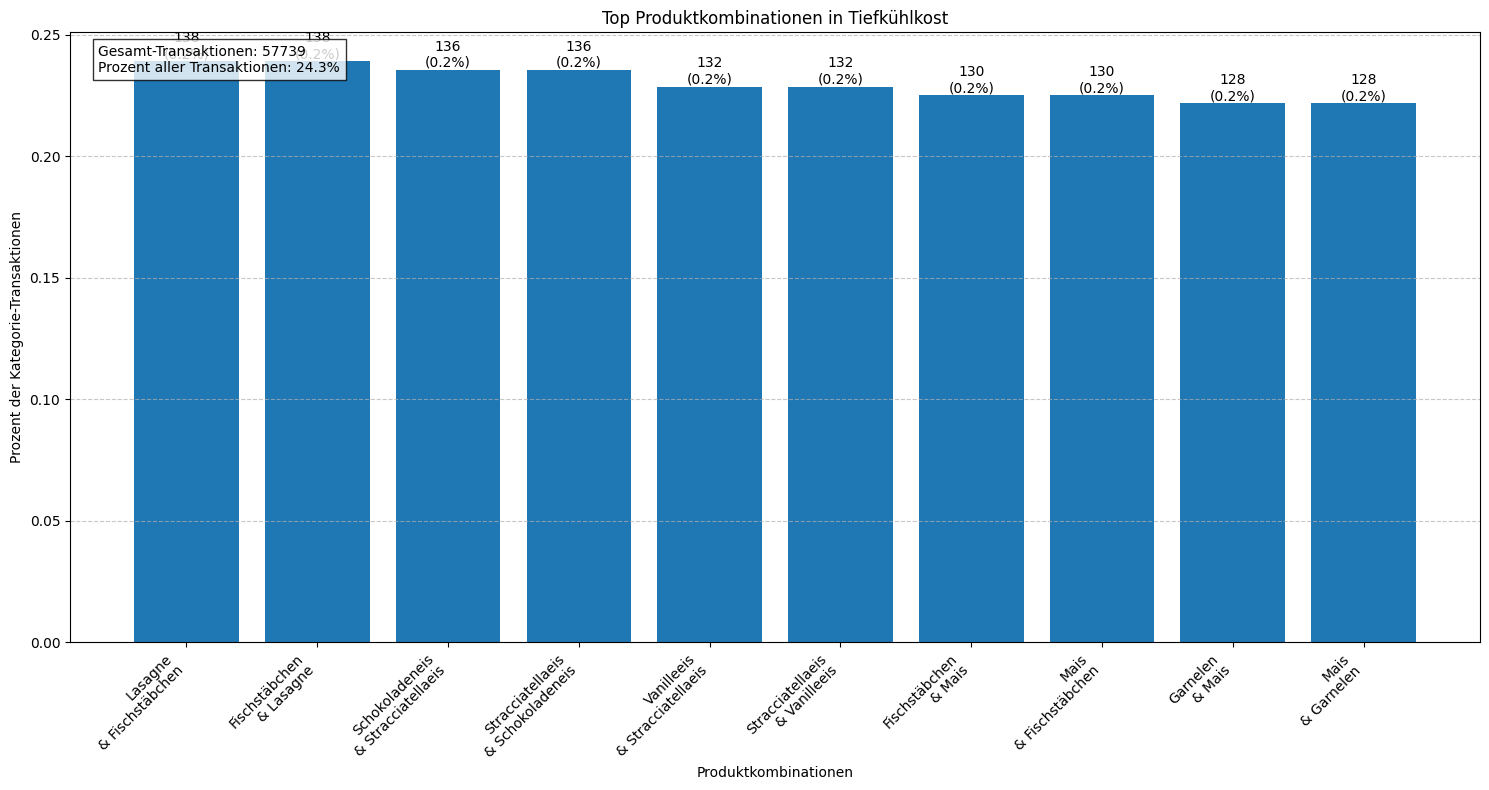


Top Produktkombinationen für Tiefkühlkost:
Lasagne & Fischstäbchen: 138 gemeinsame Transaktionen (0.24% der Kategorie-Transaktionen, 0.06% aller Transaktionen)
Fischstäbchen & Lasagne: 138 gemeinsame Transaktionen (0.24% der Kategorie-Transaktionen, 0.06% aller Transaktionen)
Schokoladeneis & Stracciatellaeis: 136 gemeinsame Transaktionen (0.24% der Kategorie-Transaktionen, 0.06% aller Transaktionen)
Stracciatellaeis & Schokoladeneis: 136 gemeinsame Transaktionen (0.24% der Kategorie-Transaktionen, 0.06% aller Transaktionen)
Vanilleeis & Stracciatellaeis: 132 gemeinsame Transaktionen (0.23% der Kategorie-Transaktionen, 0.06% aller Transaktionen)
Stracciatellaeis & Vanilleeis: 132 gemeinsame Transaktionen (0.23% der Kategorie-Transaktionen, 0.06% aller Transaktionen)
Fischstäbchen & Mais: 130 gemeinsame Transaktionen (0.23% der Kategorie-Transaktionen, 0.05% aller Transaktionen)
Mais & Fischstäbchen: 130 gemeinsame Transaktionen (0.23% der Kategorie-Transaktionen, 0.05% aller Transakti

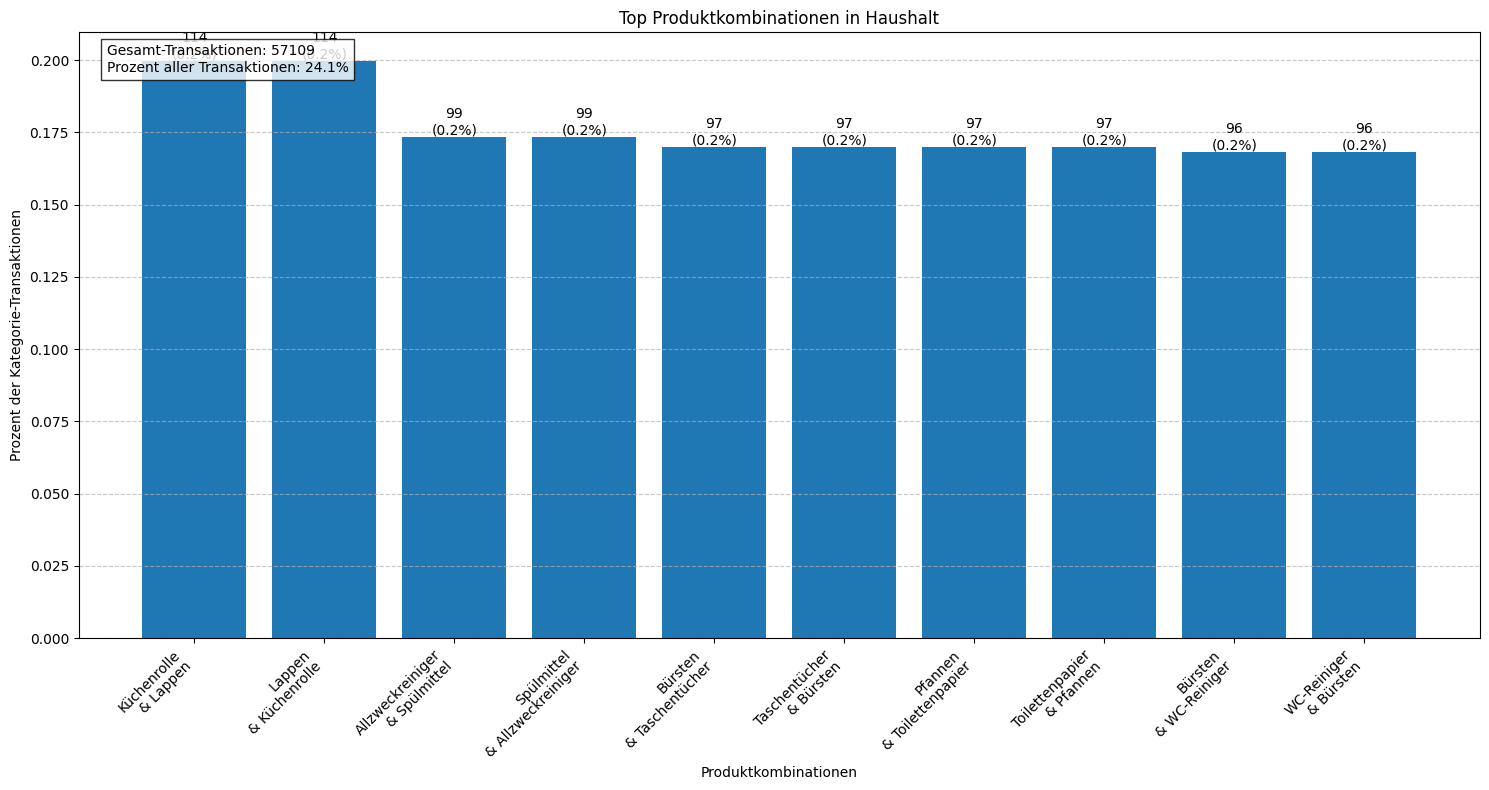


Top Produktkombinationen für Haushalt:
Küchenrolle & Lappen: 114 gemeinsame Transaktionen (0.20% der Kategorie-Transaktionen, 0.05% aller Transaktionen)
Lappen & Küchenrolle: 114 gemeinsame Transaktionen (0.20% der Kategorie-Transaktionen, 0.05% aller Transaktionen)
Allzweckreiniger & Spülmittel: 99 gemeinsame Transaktionen (0.17% der Kategorie-Transaktionen, 0.04% aller Transaktionen)
Spülmittel & Allzweckreiniger: 99 gemeinsame Transaktionen (0.17% der Kategorie-Transaktionen, 0.04% aller Transaktionen)
Bürsten & Taschentücher: 97 gemeinsame Transaktionen (0.17% der Kategorie-Transaktionen, 0.04% aller Transaktionen)
Taschentücher & Bürsten: 97 gemeinsame Transaktionen (0.17% der Kategorie-Transaktionen, 0.04% aller Transaktionen)
Pfannen & Toilettenpapier: 97 gemeinsame Transaktionen (0.17% der Kategorie-Transaktionen, 0.04% aller Transaktionen)
Toilettenpapier & Pfannen: 97 gemeinsame Transaktionen (0.17% der Kategorie-Transaktionen, 0.04% aller Transaktionen)
Bürsten & WC-Reinige

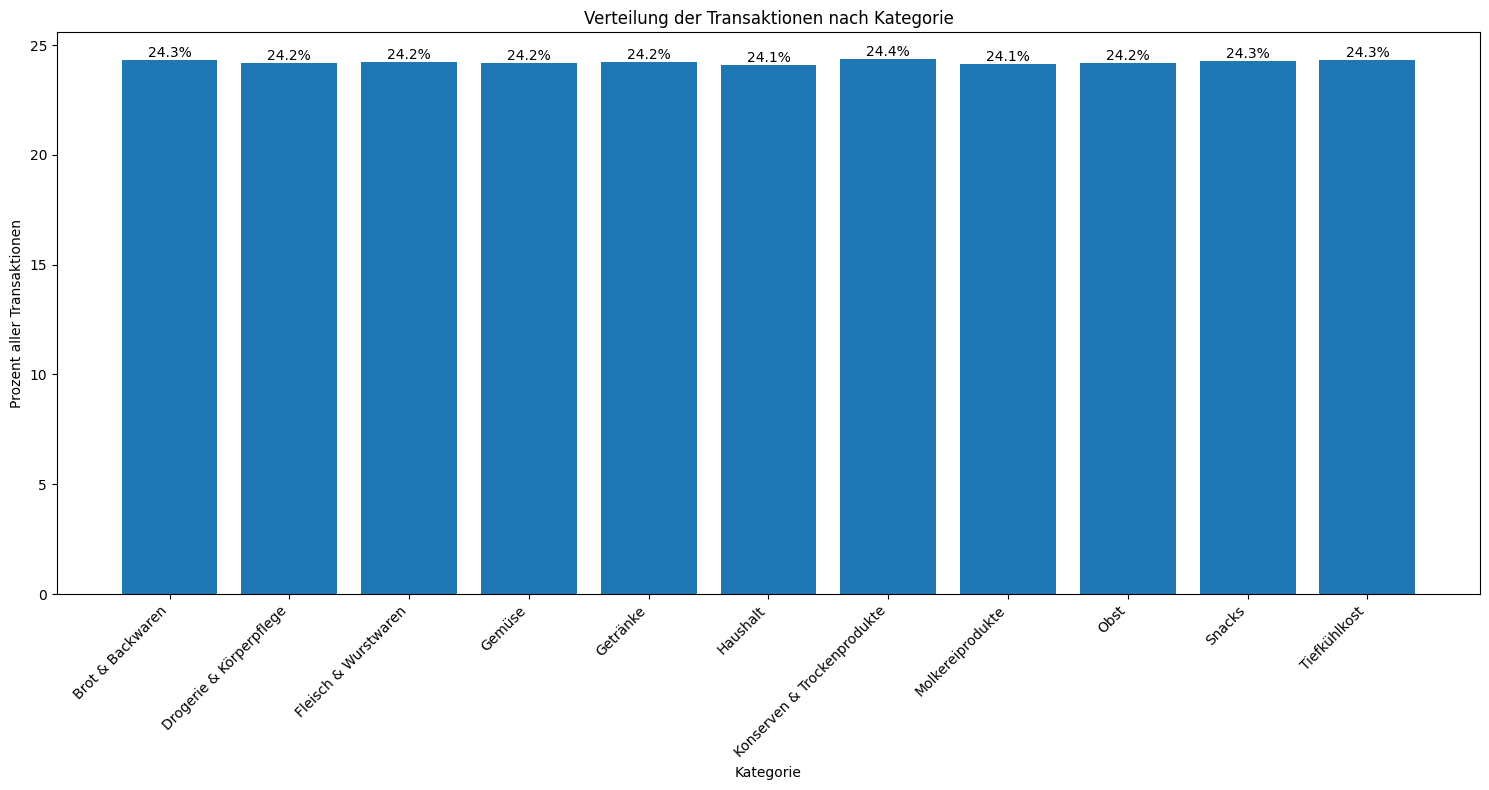

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_visualize_combinations(df, top_n=10):
    # Gesamtzahl der Transaktionen
    total_transactions = df['Transaction ID'].nunique()
    print(f"\nGesamtzahl aller Transaktionen: {total_transactions}")
    
    category_top_combinations = {}
    
    for category in df['Product Category'].unique():
        # Erstelle neue Figure für jede Kategorie
        plt.figure(figsize=(15, 8))
        
        # Filtere Daten für diese Kategorie
        category_df = df[df['Product Category'] == category]
        
        # Anzahl der Transaktionen in dieser Kategorie
        category_transactions = category_df['Transaction ID'].nunique()
        print(f"\nKategorie {category}:")
        print(f"Anzahl Transaktionen: {category_transactions}")
        print(f"Prozent aller Transaktionen: {(category_transactions/total_transactions*100):.2f}%")
        
        # Gruppiere nach Transaktion und zähle Produkte
        product_pairs = category_df.groupby('Transaction ID')['Product Name'].apply(list)
        
        # Eindeutige Produkte
        unique_products = category_df['Product Name'].unique()
        
        if len(unique_products) < 2:
            print(f"Zu wenige Produkte in Kategorie {category}")
            plt.close()
            continue
        
        # Erstelle Co-occurrence Matrix
        co_occurrence = pd.DataFrame(0, 
                                     columns=unique_products, 
                                     index=unique_products)
        
        # Zähle Produktkombinationen
        for transaction in product_pairs:
            for i in range(len(transaction)):
                for j in range(i+1, len(transaction)):
                    co_occurrence.loc[transaction[i], transaction[j]] += 1
                    co_occurrence.loc[transaction[j], transaction[i]] += 1
        
        # Flache Matrix ohne Diagonal-Werte
        co_occ_flat = co_occurrence.values
        np.fill_diagonal(co_occ_flat, 0)
        
        flattened = co_occ_flat.ravel()
        top_n_local = min(top_n, len(flattened[flattened > 0]))
        
        if top_n_local == 0:
            print(f"Keine Kombinationen in Kategorie {category}")
            plt.close()
            continue
        
        # Extrahiere Top-Kombinationen
        top_indices = np.argpartition(flattened, -top_n_local)[-top_n_local:]
        top_coords = np.unravel_index(top_indices, co_occ_flat.shape)
        
        top_pairs = [(co_occurrence.index[x], 
                      co_occurrence.columns[y], 
                      co_occurrence.iloc[x, y]) 
                     for x, y in zip(*top_coords)]
        
        # Sortiere Kombinationen
        top_pairs_sorted = sorted(top_pairs, key=lambda x: x[2], reverse=True)
        category_top_combinations[category] = top_pairs_sorted
        
        # Erstelle Daten für Plot
        product_pairs = [f"{p1}\n& {p2}" for p1, p2, _ in top_pairs_sorted]
        counts = [count for _, _, count in top_pairs_sorted]
        percentages = [(count/category_transactions)*100 for _, _, count in top_pairs_sorted]
        
        # Erstelle Balkendiagramm
        bars = plt.bar(range(len(product_pairs)), percentages)
        
        # Beschrifte Balken
        for idx, (bar, count) in enumerate(zip(bars, counts)):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{count}\n({height:.1f}%)',
                    ha='center', va='bottom')
        
        # Formatiere Plot
        plt.title(f'Top Produktkombinationen in {category}')
        plt.xlabel('Produktkombinationen')
        plt.ylabel('Prozent der Kategorie-Transaktionen')
        plt.xticks(range(len(product_pairs)), product_pairs, rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Füge Gesamtstatistik hinzu
        plt.text(0.02, 0.98, 
                f'Gesamt-Transaktionen: {category_transactions}\n' +
                f'Prozent aller Transaktionen: {(category_transactions/total_transactions*100):.1f}%',
                transform=plt.gca().transAxes,
                bbox=dict(facecolor='white', alpha=0.8),
                verticalalignment='top')
        
        plt.tight_layout()
        plt.show()
        
        # Drucke detaillierte Statistiken
        print(f"\nTop Produktkombinationen für {category}:")
        for product1, product2, count in top_pairs_sorted:
            category_percentage = (count / category_transactions) * 100
            total_percentage = (count / total_transactions) * 100
            print(f"{product1} & {product2}: "
                  f"{count} gemeinsame Transaktionen "
                  f"({category_percentage:.2f}% der Kategorie-Transaktionen, "
                  f"{total_percentage:.2f}% aller Transaktionen)")
    
    return category_top_combinations

# Erstelle Zusammenfassungsgrafik
def create_summary_visualization(df):
    category_transactions = df.groupby('Product Category')['Transaction ID'].nunique()
    total_transactions = df['Transaction ID'].nunique()
    
    plt.figure(figsize=(15, 8))
    bars = plt.bar(category_transactions.index, 
                  (category_transactions/total_transactions*100))
    
    plt.title('Verteilung der Transaktionen nach Kategorie')
    plt.xlabel('Kategorie')
    plt.ylabel('Prozent aller Transaktionen')
    plt.xticks(rotation=45, ha='right')
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Ausführen der Analyse
df = pd.read_csv("aldi_sales_data.csv", encoding='utf-8')
top_combinations_by_category = analyze_and_visualize_combinations(df)
create_summary_visualization(df)

In [57]:
# Zeitliche Muster: Detaillierte Analyse der Stoßzeiten und Kundenfrequenz

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def analyze_time_patterns_extended(df):
    """Erweiterte Analyse der zeitlichen Verkaufsmuster mit Wochentags- und Tageszeitanalyse."""
    # Sicherstellen, dass die 'DateTime' Spalte im richtigen Datetime-Format ist
    df['DateTime'] = pd.to_datetime(df['DateTime'])

    # Spalten für Stunde und Wochentag extrahieren
    df['Hour'] = df['DateTime'].dt.hour
    df['Weekday'] = df['DateTime'].dt.day_name()

    # Durchschnittlicher Umsatz pro Stunde und Wochentag
    hourly_sales = df.groupby(['Weekday', 'Hour'])['Total Amount'].mean().unstack()

    # Heatmap der Verkaufsmuster
    plt.figure(figsize=(15, 8))
    sns.heatmap(hourly_sales, annot=False, cmap='coolwarm', fmt='.1f', cbar_kws={'label': 'Durchschnittlicher Umsatz (€)'})
    plt.title('Durchschnittlicher Umsatz nach Tageszeit und Wochentag')
    plt.xlabel('Stunde des Tages')
    plt.ylabel('Wochentag')
    
    # Sicherstellen, dass die Wochentage in der richtigen Reihenfolge angezeigt werden
    weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    plt.xticks(ticks=np.arange(24), labels=[str(i) for i in range(24)])
    plt.yticks(ticks=np.arange(len(weekdays_order)), labels=weekdays_order, rotation=0)
    
    plt.show()

    return hourly_sales



In [27]:
# Kundensegmentierung: Clustering der Kunden basierend auf Einkaufsverhalten

def analyze_customer_segments(df):
    """Analysiert Kundensegmente basierend auf Einkaufsverhalten"""
    customer_behavior = df.groupby('Transaction ID').agg({
        'Total Amount': 'sum',
        'Product Name': 'count',
        'Discount Applied': 'mean'
    }).rename(columns={'Product Name': 'Items_per_Transaction'})
    
    # K-Means Clustering
    X = customer_behavior[['Total Amount', 'Items_per_Transaction']]
    kmeans = KMeans(n_clusters=4, random_state=42)
    customer_behavior['Segment'] = kmeans.fit_predict(X)
    
    # Visualisierung der Segmente
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=customer_behavior, x='Total Amount', y='Items_per_Transaction', 
                    hue='Segment', palette='deep')
    plt.title('Kundensegmente basierend auf Einkaufsverhalten')
    plt.xlabel('Gesamtbetrag (€)')
    plt.ylabel('Artikel pro Einkauf')
    plt.show()
    
    return customer_behavior

In [28]:
# Erweiterte Produktkorrelationen: Identifikation von Cross-Selling-Potentialen

def analyze_product_correlations(df):
    """Analysiert Produktkorrelationen und erstellt Empfehlungen"""
    # Pivot-Tabelle für Produktkäufe pro Transaktion
    transaction_products = pd.pivot_table(
        df,
        index='Transaction ID',
        columns='Product Name',
        values='Quantity Sold',
        aggfunc='sum',
        fill_value=0
    )
    
    # Korrelationsmatrix berechnen
    correlations = transaction_products.corr()
    
    # Top Produktkorrelationen finden
    top_correlations = []
    for product in correlations.columns:
        corr_series = correlations[product].sort_values(ascending=False)
        # Zweithöchste Korrelation (erste ist immer 1.0 mit sich selbst)
        if len(corr_series) > 1:
            top_correlations.append({
                'Product1': product,
                'Product2': corr_series.index[1],
                'Correlation': corr_series.iloc[1]
            })
    
    return pd.DataFrame(top_correlations).sort_values('Correlation', ascending=False)

In [29]:
# Saisonale Trends: Analyse monatlicher und wöchentlicher Verkaufsmuster

def analyze_seasonal_trends(df):
    """Analysiert saisonale Trends"""
    df['Month'] = df['DateTime'].dt.month
    df['Week'] = df['DateTime'].dt.isocalendar().week
    
    # Monatliche Trends
    monthly_sales = df.groupby(['Month', 'Product Category'])['Total Amount'].sum().unstack()
    
    # Heatmap der monatlichen Verkäufe pro Kategorie
    plt.figure(figsize=(15, 8))
    sns.heatmap(monthly_sales, cmap='YlOrRd', annot=True, fmt='.0f')
    plt.title('Monatliche Verkäufe pro Kategorie')
    plt.xlabel('Produktkategorie')
    plt.ylabel('Monat')
    plt.show()
    
    return monthly_sales

In [30]:
# Rabatteffektivität: Detaillierte Analyse der Wirksamkeit von Promotionen

def analyze_discount_effectiveness(df):
    """Analysiert die Effektivität von Rabatten"""
    discount_analysis = df.groupby('Product Category').agg({
        'Discount Applied': ['mean', 'count'],
        'Quantity Sold': 'sum',
        'Total Amount': 'sum'
    })
    
    # Berechne Umsatz pro verkaufter Einheit
    discount_analysis['Revenue_per_Unit'] = (
        discount_analysis['Total Amount']['sum'] / 
        discount_analysis['Quantity Sold']['sum']
    )
    
    return discount_analysis

In [31]:
# Hauptfunktion für die Analyse
def run_advanced_analysis(df):
    """Führt alle Analysen aus und gibt Empfehlungen"""
    print("=== Zeitliche Muster ===")
    hourly_patterns = analyze_time_patterns(df)
    peak_hours = hourly_patterns.nlargest(3).index.tolist()
    print(f"Stoßzeiten: {peak_hours} Uhr")
    
    print("\n=== Kundensegmentierung ===")
    customer_segments = analyze_customer_segments(df)
    print(f"Anzahl verschiedener Kundensegmente: {len(customer_segments['Segment'].unique())}")
    
    print("\n=== Produktkorrelationen ===")
    correlations = analyze_product_correlations(df)
    print("Top 5 Produktkombinationen für Cross-Selling:")
    print(correlations.head())
    
    print("\n=== Saisonale Trends ===")
    seasonal_trends = analyze_seasonal_trends(df)
    
    print("\n=== Rabatteffektivität ===")
    discount_effect = analyze_discount_effectiveness(df)
    print(discount_effect)
    
    # Generiere Empfehlungen
    print("\n=== Empfehlungen ===")
    generate_recommendations(hourly_patterns, customer_segments, correlations, 
                           seasonal_trends, discount_effect)

In [32]:
def generate_recommendations(hourly_patterns, customer_segments, correlations, 
                           seasonal_trends, discount_effect):
    """Generiert geschäftliche Empfehlungen basierend auf den Analysen"""
    recommendations = [
        "1. Personalplanung:",
        f"   - Verstärkte Besetzung während der Stoßzeiten",
        "   - Optimierung der Kassenbelegung basierend auf Kundenaufkommen",
        
        "\n2. Produktplatzierung:",
        "   - Stark korrelierende Produkte nebeneinander platzieren",
        "   - Saisonale Produkte prominent positionieren",
        
        "\n3. Marketing und Promotion:",
        "   - Gezielte Rabattaktionen für schwächere Tageszeiten",
        "   - Cross-Selling-Aktionen für häufig kombinierte Produkte",
        
        "\n4. Bestandsmanagement:",
        "   - Anpassung der Bestellmengen an saisonale Trends",
        "   - Optimierung der Lagerhaltung basierend auf Verkaufsmustern",
        
        "\n5. Kundenservice:",
        "   - Personalisierte Angebote basierend auf Kundensegmenten",
        "   - Optimierung der Öffnungszeiten nach Kundenfrequenz"
    ]
    
    print("\n".join(recommendations))

=== Zeitliche Muster ===


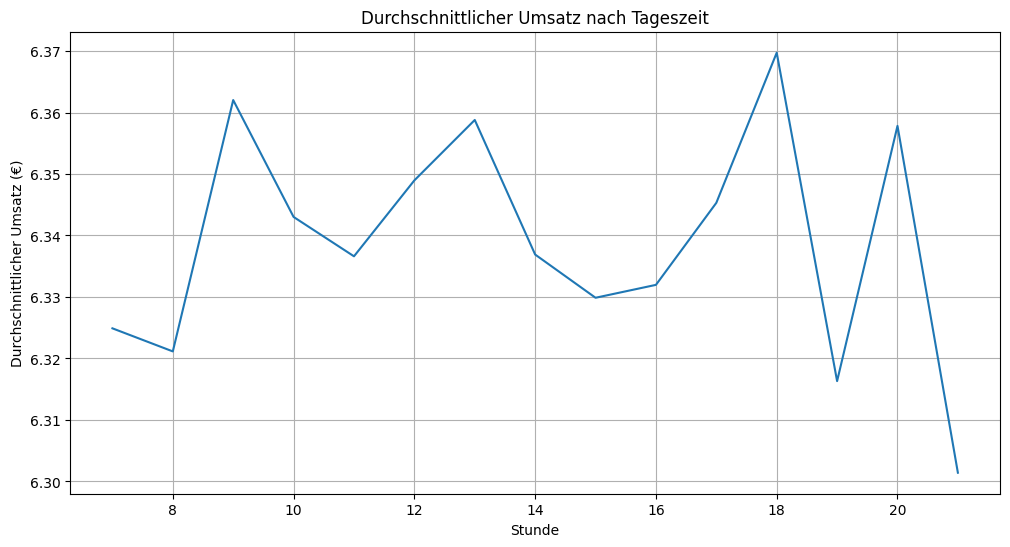

Stoßzeiten: [18, 9, 13] Uhr

=== Kundensegmentierung ===


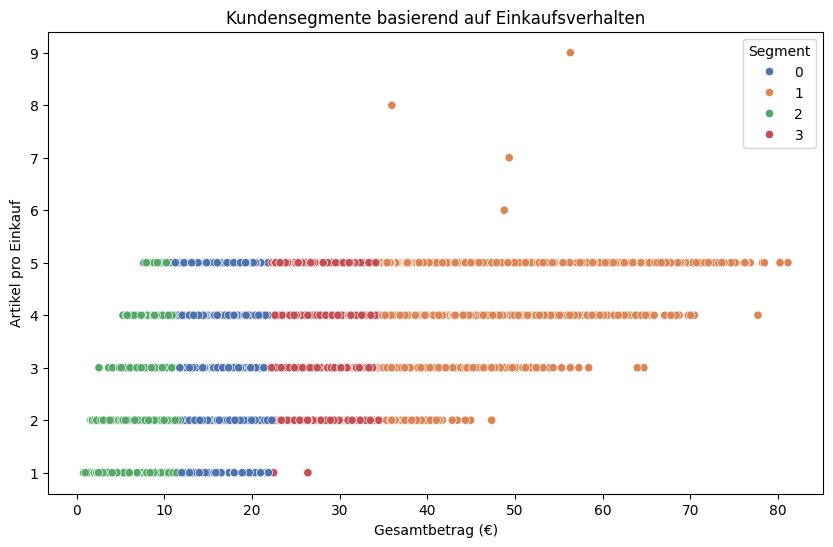

Anzahl verschiedener Kundensegmente: 4

=== Produktkorrelationen ===
Top 5 Produktkombinationen für Cross-Selling:
               Product1            Product2  Correlation
51               Lappen         Küchenrolle     0.006343
49          Küchenrolle              Lappen     0.006343
125  laktosefreie Milch         Lippenstift     0.006154
55          Lippenstift  laktosefreie Milch     0.006154
9            Bodylotion          Mortadella     0.005857

=== Saisonale Trends ===


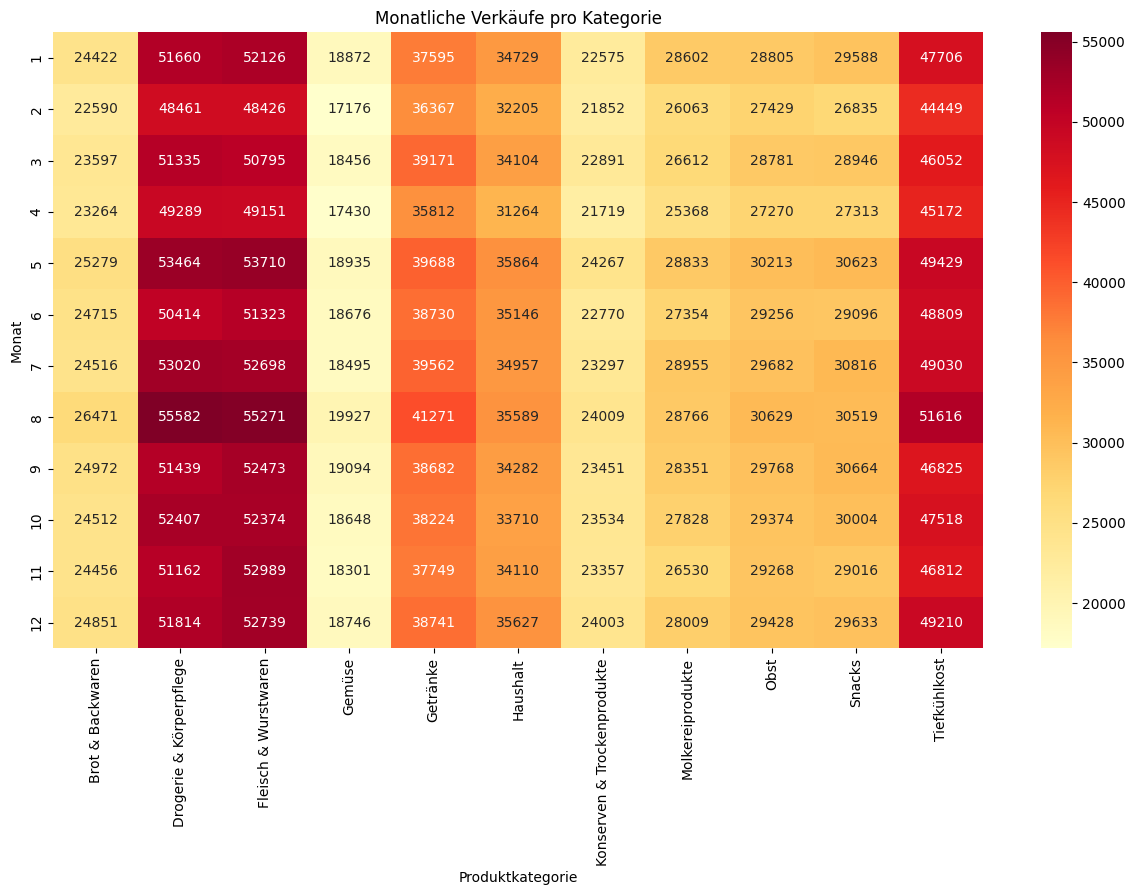


=== Rabatteffektivität ===
                            Discount Applied        Quantity Sold  \
                                        mean  count           sum   
Product Category                                                    
Brot & Backwaren                    0.005998  65067        130397   
Drogerie & Körperpflege             0.004077  64663        129179   
Fleisch & Wurstwaren                0.005445  64802        129773   
Gemüse                              0.006526  64646        129370   
Getränke                            0.003012  64678        129295   
Haushalt                            0.003260  64348        128699   
Konserven & Trockenprodukte         0.008711  65339        130900   
Molkereiprodukte                    0.002545  64557        129403   
Obst                                0.009673  64618        129568   
Snacks                              0.011996  64847        129534   
Tiefkühlkost                        0.001964  65218        130478   

     

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats
from datetime import datetime, timedelta

def analyze_time_patterns(df):
    """Analysiert zeitliche Verkaufsmuster"""
    # Datetime-Konvertierung sicherstellen
    try:
        df['DateTime'] = pd.to_datetime(df['DateTime'])
    except Exception as e:
        print(f"Fehler bei der DateTime-Konvertierung: {e}")
        print("Bitte überprüfen Sie das Format Ihrer DateTime-Spalte")
        return None
    
    # Stunden und Minuten extrahieren
    df['Hour'] = df['DateTime'].dt.hour
    
    # Durchschnittlicher Umsatz pro Stunde
    hourly_sales = df.groupby('Hour')['Total Amount'].mean()
    
    # Visualisierung der Stoßzeiten
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=hourly_sales)
    plt.title('Durchschnittlicher Umsatz nach Tageszeit')
    plt.xlabel('Stunde')
    plt.ylabel('Durchschnittlicher Umsatz (€)')
    plt.grid(True)
    plt.show()
    
    return hourly_sales

# Rest des Codes bleibt gleich...

def run_advanced_analysis(df):
    """Führt alle Analysen aus und gibt Empfehlungen"""
    # Datetime-Konvertierung am Anfang durchführen
    try:
        df['DateTime'] = pd.to_datetime(df['DateTime'])
    except Exception as e:
        print(f"Fehler bei der DateTime-Konvertierung: {e}")
        print("Bitte überprüfen Sie das Format Ihrer DateTime-Spalte")
        # Beispiel des erwarteten Formats ausgeben
        print("Erwartetes Format: YYYY-MM-DD HH:MM:SS")
        return
    
    print("=== Zeitliche Muster ===")
    hourly_patterns = analyze_time_patterns(df)
    if hourly_patterns is None:
        return
    
    peak_hours = hourly_patterns.nlargest(3).index.tolist()
    print(f"Stoßzeiten: {peak_hours} Uhr")
    
    print("\n=== Kundensegmentierung ===")
    customer_segments = analyze_customer_segments(df)
    print(f"Anzahl verschiedener Kundensegmente: {len(customer_segments['Segment'].unique())}")
    
    print("\n=== Produktkorrelationen ===")
    correlations = analyze_product_correlations(df)
    print("Top 5 Produktkombinationen für Cross-Selling:")
    print(correlations.head())
    
    print("\n=== Saisonale Trends ===")
    seasonal_trends = analyze_seasonal_trends(df)
    
    print("\n=== Rabatteffektivität ===")
    discount_effect = analyze_discount_effectiveness(df)
    print(discount_effect)
    
    print("\n=== Empfehlungen ===")
    generate_recommendations(hourly_patterns, customer_segments, correlations, 
                           seasonal_trends, discount_effect)

# Daten einlesen und Analyse ausführen
df = pd.read_csv("aldi_sales_data.csv", encoding='utf-8')
run_advanced_analysis(df)